IMPORTING LIBRARIES

In [297]:
import requests
from bs4 import BeautifulSoup as soup
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import re
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# SAINSBURY 

RED WINE 

Defining headers

In [298]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}


Creating HTML Get request

In [299]:
html = requests.get('https://www.sainsburys.co.uk/shop/gb/groceries/drinks/CategoryDisplay?langId=44&storeId=10151&catalogId=10241&categoryId=258772&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&beginIndex=0&facet=4294953611&facet=&facet=&facet=&promotionId=&listId=&searchTerm=&hasPreviousOrder=&previousOrderId=&categoryFacetId1=&categoryFacetId2=&ImportedProductsCount=&ImportedStoreName=&ImportedSupermarket=&bundleId=&parent_category_rn=12192&top_category=12192&pageSize=120#langId=44&storeId=10151&catalogId=10241&categoryId=258772&parent_category_rn=12192&top_category=12192&pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&searchTerm=&beginIndex=0&hideFilters=true&facet=4294953611&facet=&facet=')

Defining object for scrapping

In [300]:
bsobj = soup(html.content,'lxml')

In [301]:
bsobj

<!DOCTYPE html>
<html class="noJs" lang="en" xml:lang="en" xmlns:wairole="http://www.w3.org/2005/01/wai-rdf/GUIRoleTaxonomy#" xmlns:waistate="http://www.w3.org/2005/07/aaa">
<!-- BEGIN CategoriesDisplay.jsp -->
<head>
<title>All wine | Sainsbury's</title>
<meta content="Buy All wine online from Sainsbury's, the same great quality, freshness and choice you'd find in store. Choose from 1 hour delivery slots and collect Nectar points." name="description"/>
<meta content="" name="keyword"/>
<link href="https://www.sainsburys.co.uk/shop/gb/groceries/drinks/all-wine-" rel="canonical"/>
<meta content="NOINDEX, FOLLOW" name="ROBOTS"/>
<!-- BEGIN CommonCSSToInclude.jspf --><!--[if IE 8]>
    <link type="text/css" href="//www.sainsburys.co.uk/wcsstore7.97.5/SainsburysStorefrontAssetStore/css/main-ie8.min.css" rel="stylesheet" media="all" />
	<![endif]-->
<!--[if !IE 8]><!-->
<link href="//www.sainsburys.co.uk/wcsstore7.97.5/SainsburysStorefrontAssetStore/css/main.min.css" media="all" rel="styles

Making a URL list for links to scrape

In [302]:
url_list = ['https://www.sainsburys.co.uk/shop/gb/groceries/drinks/CategoryDisplay?langId=44&storeId=10151&catalogId=10241&categoryId=258772&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&beginIndex=0&facet=4294953611&facet=&facet=&facet=&promotionId=&listId=&searchTerm=&hasPreviousOrder=&previousOrderId=&categoryFacetId1=&categoryFacetId2=&ImportedProductsCount=&ImportedStoreName=&ImportedSupermarket=&bundleId=&parent_category_rn=12192&top_category=12192&pageSize=120#langId=44&storeId=10151&catalogId=10241&categoryId=258772&parent_category_rn=12192&top_category=12192&pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&searchTerm=&beginIndex=0&hideFilters=true&facet=4294953611&facet=&facet=','https://www.sainsburys.co.uk/shop/CategoryDisplay?pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&storeId=10151&promotionId=&listId=&catalogId=10241&searchTerm=&beginIndex=120&top_category=12192&langId=44&facet=4294953611&facet=&facet=&facet=&categoryId=258772&parent_category_rn=12192']

Finding the product name 

In [303]:
bsobj.findAll('div',{'class':'productNameAndPromotions'})

[<div class="productNameAndPromotions">
 <h3>
 <a href="https://www.sainsburys.co.uk/shop/gb/groceries/product/details/all-wine-/19-crimes-red-wine-75cl">
                                         19 Crimes Red Wine 75cl
                                         <img alt="" src="https://assets.sainsburys-groceries.co.uk/gol/8008354/image.jpg"/>
 </a>
 </h3>
 <div class="promotion">
 <p><a href="https://www.sainsburys.co.uk/shop/PromotionDisplayView?catalogId=10170&amp;productId=1338692&amp;langId=44&amp;storeId=10151&amp;promotionId=10543051"><!-- BEGIN include/PromotionStrapline.jspf -->Only £7.50: Save £1.50<br/>
 <!-- FINISH include/PromotionStrapline.jspf -->
 </a></p>
 </div>
 </div>,
 <div class="productNameAndPromotions">
 <h3>
 <a href="https://www.sainsburys.co.uk/shop/gb/groceries/product/details/all-wine-/diablo-dark-red-75cl">
                                         Diablo Dark Red 75cl
                                         <img alt="" src="https://assets.sainsburys-groce

Finding the Price element

In [304]:
bsobj.findAll('p',{'class':'pricePerUnit'})

[<p class="pricePerUnit">
         £7.50 
 </p>,
 <p class="pricePerUnit">
         £10.00 
 </p>,
 <p class="pricePerUnit">
         £8.00 
 </p>,
 <p class="pricePerUnit">
         £9.00 
 </p>,
 <p class="pricePerUnit">
         £7.50 
 </p>,
 <p class="pricePerUnit">
         £9.00 
 </p>,
 <p class="pricePerUnit">
         £7.50 
 </p>,
 <p class="pricePerUnit">
         £7.00 
 </p>,
 <p class="pricePerUnit">
         £7.50 
 </p>,
 <p class="pricePerUnit">
         £10.00 
 </p>,
 <p class="pricePerUnit">
         £5.00 
 </p>,
 <p class="pricePerUnit">
         £5.50 
 </p>,
 <p class="pricePerUnit">
         £7.00 
 </p>,
 <p class="pricePerUnit">
         £5.50 
 </p>,
 <p class="pricePerUnit">
         £8.00 
 </p>,
 <p class="pricePerUnit">
         £5.50 
 </p>,
 <p class="pricePerUnit">
         £6.50 
 </p>,
 <p class="pricePerUnit">
         £6.50 
 </p>,
 <p class="pricePerUnit">
         £8.00 
 </p>,
 <p class="pricePerUnit">
         £6.00 
 </p>,
 <p class="pricePe

Making a list

In [305]:
item_name = []
item_price = []



Creating a loop to fill all the values

In [306]:
for url in url_list:
    result = requests.get(url)
    bsobj = soup(result.content,'lxml')
    
    product_name = bsobj.findAll('div',{'class':'productNameAndPromotions'})
    product_price = bsobj.findAll('p',{'class':'pricePerUnit'})
    for names,price in zip(product_name,product_price):
        item_name.append(names.h3.a.text.strip())
        item_price.append(price.text.strip())

Making a loop to remove the unwanted items

In [307]:
converted_list = []

for element in item_price:
    converted_list.append(element.strip())

print(converted_list)

['£7.50', '£10.00', '£8.00', '£9.00', '£7.50', '£9.00', '£7.50', '£7.00', '£7.50', '£10.00', '£5.00', '£5.50', '£7.00', '£5.50', '£8.00', '£5.50', '£6.50', '£6.50', '£8.00', '£6.00', '£8.00', '£6.50', '£4.85', '£5.00', '£6.00', '£6.00', '£7.00', '£6.50', '£7.00', '£4.50', '£4.75', '£5.75', '£9.00', '£6.00', '£6.50', '£8.50', '£5.50', '£7.50', '£6.50', '£1.80', '£6.00', '£4.50', '£6.00', '£13.00', '£5.00', '£7.00', '£4.50', '£7.00', '£7.00', '£7.00', '£6.00', '£13.00', '£3.00', '£4.50', '£7.00', '£6.25', '£8.00', '£7.50', '£1.80', '£8.00', '£7.50', '£2.50', '£13.00', '£6.00', '£4.50', '£7.00', '£6.50', '£13.00', '£8.00', '£8.00', '£5.00', '£7.50', '£17.50', '£4.50', '£7.50', '£6.00', '£12.00', '£2.00', '£8.50', '£5.00', '£20.00', '£6.00', '£8.00', '£8.00', '£3.29', '£11.00', '£5.00', '£2.00', '£7.50', '£7.00', '£2.50', '£8.00', '£8.00', '£7.00', '£8.00', '£8.00', '£7.00', '£7.00', '£6.50', '£9.00', '£10.00', '£3.95', '£16.00', '£6.50', '£10.00', '£10.00', '£5.50', '£10.00', '£6.25', '£1

Making a dataframe for Red wines

In [308]:

Sains_red_wine = pd.DataFrame({'Product_Name':item_name, 'Price':converted_list}, columns=['Product_Name', 'Price'])
Sains_red_wine.insert(0,'Wine_Type','RED')
Sains_red_wine.head()
Sains_red_wine

Wine_Type                                       Product_Name   Price
0         RED                            19 Crimes Red Wine 75cl   £7.50
1         RED                               Diablo Dark Red 75cl  £10.00
2         RED                 Apothic Red Winemaker's Blend 75cl   £8.00
3         RED                   Carnivor Zinfandel Red Wine 75cl   £9.00
4         RED  Sainsbury's Rioja Reserva, Taste the Differenc...   £7.50
..        ...                                                ...     ...
180       RED      Sainsbury's Barolo, Taste the Difference 75cl  £14.00
181       RED     Hawkstone Napa Valley Cabernet Sauvignon 750ml  £22.50
182       RED                                   Bosman Nero 75cl  £11.00
183       RED           Torres Natureo De-Alcoholised Syrah 75cl   £6.00
184       RED      Rawson's Retreat 0.5% Cabernet Sauvignon 75cl   £5.00

[185 rows x 3 columns]

Replacing the pound sign and making the price into interger for getting visualisations

In [309]:
Sains_red_wine['Price'] = Sains_red_wine['Price'].str.replace('£', '')
Sains_red_wine['Price'] = pd.to_numeric(Sains_red_wine['Price'])
Sains_red_wine

Wine_Type                                       Product_Name  Price
0         RED                            19 Crimes Red Wine 75cl    7.5
1         RED                               Diablo Dark Red 75cl   10.0
2         RED                 Apothic Red Winemaker's Blend 75cl    8.0
3         RED                   Carnivor Zinfandel Red Wine 75cl    9.0
4         RED  Sainsbury's Rioja Reserva, Taste the Differenc...    7.5
..        ...                                                ...    ...
180       RED      Sainsbury's Barolo, Taste the Difference 75cl   14.0
181       RED     Hawkstone Napa Valley Cabernet Sauvignon 750ml   22.5
182       RED                                   Bosman Nero 75cl   11.0
183       RED           Torres Natureo De-Alcoholised Syrah 75cl    6.0
184       RED      Rawson's Retreat 0.5% Cabernet Sauvignon 75cl    5.0

[185 rows x 3 columns]

In [310]:
SAINSREDWINE=Sains_red_wine['Price']

IDENTIFYING THE DUPLICATED DATA

In [311]:
dups = Sains_red_wine.duplicated()

In [312]:
print(dups.any())

False


In [313]:
print(Sains_red_wine[dups])

Empty DataFrame
Columns: [Wine_Type, Product_Name, Price]
Index: []


In [314]:

Sains_red_wine.drop_duplicates(inplace=True)
print(Sains_red_wine.shape)

(185, 3)


In [315]:
Sains_red_wine

Wine_Type                                       Product_Name  Price
0         RED                            19 Crimes Red Wine 75cl    7.5
1         RED                               Diablo Dark Red 75cl   10.0
2         RED                 Apothic Red Winemaker's Blend 75cl    8.0
3         RED                   Carnivor Zinfandel Red Wine 75cl    9.0
4         RED  Sainsbury's Rioja Reserva, Taste the Differenc...    7.5
..        ...                                                ...    ...
180       RED      Sainsbury's Barolo, Taste the Difference 75cl   14.0
181       RED     Hawkstone Napa Valley Cabernet Sauvignon 750ml   22.5
182       RED                                   Bosman Nero 75cl   11.0
183       RED           Torres Natureo De-Alcoholised Syrah 75cl    6.0
184       RED      Rawson's Retreat 0.5% Cabernet Sauvignon 75cl    5.0

[185 rows x 3 columns]

In [316]:
Sains_red_wine['Price'] = pd.to_numeric(Sains_red_wine['Price'])

Making a box plot for the prices in sainsbury

[Text(0.5, 1.0, "Sainsbury's Redwine\xa0Price Distribution")]

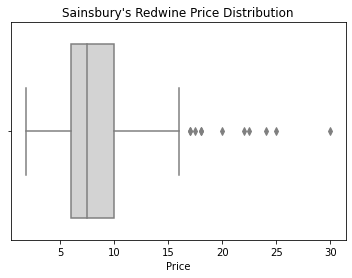

In [317]:
sns.boxplot(data=Sains_red_wine, x="Price",color="lightgrey").set(title="Sainsbury's Redwine Price Distribution")

Generating a CSV if needed for more analysis

In [318]:
df = pd.DataFrame(Sains_red_wine)
df.to_csv('redwine_sainsbury.csv', index=False, header=True)

WHITE WINE

Similar process

In [319]:
html = requests.get('https://www.sainsburys.co.uk/shop/CategoryDisplay?pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&storeId=10151&promotionId=&listId=&catalogId=10241&searchTerm=&beginIndex=0&top_category=12192&langId=44&facet=4294953612&facet=&facet=&categoryId=258772&parent_category_rn=12192''https://www.sainsburys.co.uk/shop/gb/groceries/drinks/CategoryDisplay?langId=44&storeId=10151&catalogId=10241&categoryId=258772&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&beginIndex=0&facet=4294953612&facet=&facet=&promotionId=&listId=&searchTerm=&hasPreviousOrder=&previousOrderId=&categoryFacetId1=&categoryFacetId2=&ImportedProductsCount=&ImportedStoreName=&ImportedSupermarket=&bundleId=&parent_category_rn=12192&top_category=12192&pageSize=120#langId=44&storeId=10151&catalogId=10241&categoryId=258772&parent_category_rn=12192&top_category=12192&pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&searchTerm=&beginIndex=0&hideFilters=true&facet=4294953612&facet=&facet=','https://www.sainsburys.co.uk/shop/CategoryDisplay?pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&storeId=10151&promotionId=&listId=&catalogId=10241&searchTerm=&beginIndex=120&top_category=12192&langId=44&facet=4294953612&facet=&facet=&categoryId=258772&parent_category_rn=12192',headers=header)

In [320]:
bsobj = soup(html.content,'lxml')

In [321]:
bsobj

<!DOCTYPE html>
<html class="noJs" lang="en" xml:lang="en" xmlns:wairole="http://www.w3.org/2005/01/wai-rdf/GUIRoleTaxonomy#" xmlns:waistate="http://www.w3.org/2005/07/aaa">
<!-- BEGIN CategoriesDisplay.jsp -->
<head>
<title>All wine | Sainsbury's</title>
<meta content="Buy All wine online from Sainsbury's, the same great quality, freshness and choice you'd find in store. Choose from 1 hour delivery slots and collect Nectar points." name="description"/>
<meta content="" name="keyword"/>
<link href="https://www.sainsburys.co.uk/shop/gb/groceries/drinks/all-wine-" rel="canonical"/>
<meta content="NOINDEX, FOLLOW" name="ROBOTS"/>
<!-- BEGIN CommonCSSToInclude.jspf --><!--[if IE 8]>
    <link type="text/css" href="//www.sainsburys.co.uk/wcsstore7.97.5/SainsburysStorefrontAssetStore/css/main-ie8.min.css" rel="stylesheet" media="all" />
	<![endif]-->
<!--[if !IE 8]><!-->
<link href="//www.sainsburys.co.uk/wcsstore7.97.5/SainsburysStorefrontAssetStore/css/main.min.css" media="all" rel="styles

List of URLs in case of multiples

In [322]:

url_list = ['https://www.sainsburys.co.uk/shop/gb/groceries/drinks/CategoryDisplay?langId=44&storeId=10151&catalogId=10241&categoryId=258772&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&beginIndex=0&facet=4294953612&facet=&facet=&promotionId=&listId=&searchTerm=&hasPreviousOrder=&previousOrderId=&categoryFacetId1=&categoryFacetId2=&ImportedProductsCount=&ImportedStoreName=&ImportedSupermarket=&bundleId=&parent_category_rn=12192&top_category=12192&pageSize=120#langId=44&storeId=10151&catalogId=10241&categoryId=258772&parent_category_rn=12192&top_category=12192&pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&searchTerm=&beginIndex=0&hideFilters=true&facet=4294953612&facet=&facet=','https://www.sainsburys.co.uk/shop/CategoryDisplay?pageSize=120&orderBy=FAVOURITES_ONLY%7CSEQUENCING%7CTOP_SELLERS&storeId=10151&promotionId=&listId=&catalogId=10241&searchTerm=&beginIndex=120&top_category=12192&langId=44&facet=4294953612&facet=&facet=&categoryId=258772&parent_category_rn=12192']


In [323]:
bsobj.findAll('div',{'class':'productNameAndPromotions'})

[<div class="productNameAndPromotions">
 <h3>
 <a href="https://www.sainsburys.co.uk/shop/gb/groceries/product/details/all-wine-/sainsburys-coolwater-marlborough-sauvignon--taste-the-difference-75cl">
                                         Sainsbury's Coolwater Bay Marlborough Sauvignon, Taste the Difference 75cl
                                         <img alt="" src="https://assets.sainsburys-groceries.co.uk/gol/6367461/image.jpg"/>
 </a>
 </h3>
 </div>,
 <div class="productNameAndPromotions">
 <h3>
 <a href="https://www.sainsburys.co.uk/shop/gb/groceries/product/details/all-wine-/sainsburys-chilean-sauvignon-blanc--taste-the-difference-75cl">
                                         Sainsbury's Chilean Sauvignon Blanc, Taste the Difference 75cl
                                         <img alt="" src="https://assets.sainsburys-groceries.co.uk/gol/6738331/image.jpg"/>
 </a>
 </h3>
 </div>,
 <div class="productNameAndPromotions">
 <h3>
 <a href="https://www.sainsburys.co.uk/shop/gb

In [324]:
bsobj.findAll('p',{'class':'pricePerUnit'})

[<p class="pricePerUnit">
         £8.00 
 </p>,
 <p class="pricePerUnit">
         £8.00 
 </p>,
 <p class="pricePerUnit">
         £8.50 
 </p>,
 <p class="pricePerUnit">
         £6.50 
 </p>,
 <p class="pricePerUnit">
         £10.00 
 </p>,
 <p class="pricePerUnit">
         £5.25 
 </p>,
 <p class="pricePerUnit">
         £5.50 
 </p>,
 <p class="pricePerUnit">
         £10.00 
 </p>,
 <p class="pricePerUnit">
         £7.00 
 </p>,
 <p class="pricePerUnit">
         £7.50 
 </p>,
 <p class="pricePerUnit">
         £5.50 
 </p>,
 <p class="pricePerUnit">
         £8.50 
 </p>,
 <p class="pricePerUnit">
         £9.00 
 </p>,
 <p class="pricePerUnit">
         £6.00 
 </p>,
 <p class="pricePerUnit">
         £10.00 
 </p>,
 <p class="pricePerUnit">
         £7.00 
 </p>,
 <p class="pricePerUnit">
         £4.85 
 </p>,
 <p class="pricePerUnit">
         £7.00 
 </p>,
 <p class="pricePerUnit">
         £7.50 
 </p>,
 <p class="pricePerUnit">
         £5.40 
 </p>,
 <p class="priceP

Defining items

In [325]:
item_name = []
item_price = []


Creating a loop to get all the product name & prices

In [326]:
for url in url_list:
    result = requests.get(url)
    bsobj = soup(result.content,'lxml')
    
    product_name = bsobj.findAll('div',{'class':'productNameAndPromotions'})
    product_price = bsobj.findAll('p',{'class':'pricePerUnit'})
    product_promotion = bsobj.findAll('div',{'class':'promotion'})
    for names,price,promotion in zip(product_name,product_price,product_promotion):
        item_name.append(names.h3.a.text.strip())
        item_price.append(price.text)
       

loop to get the prices by removing the unwanted variables

In [327]:
converted_list = []

for element in item_price:
    converted_list.append(element.strip())

print(converted_list)


['£8.00', '£8.00', '£8.50', '£6.50', '£10.00', '£5.25', '£5.50', '£10.00', '£7.00', '£7.50', '£5.50', '£8.50', '£9.00', '£6.00', '£10.00', '£7.00', '£4.85', '£7.00', '£7.50', '£5.40', '£13.00', '£4.50', '£6.00', '£7.00', '£4.75', '£13.00', '£8.00', '£6.50', '£5.50', '£8.00', '£5.00', '£6.00', '£5.75', '£6.00', '£9.00', '£5.00', '£7.00', '£7.50', '£16.00', '£3.75', '£9.00', '£13.00', '£2.25', '£9.00', '£8.00', '£10.00', '£7.00', '£7.00', '£12.00']


Creating a data frame for visualistion & analysing the data

In [328]:
df_White_wine= pd.DataFrame({'Product_Name':item_name, 'Price':converted_list}, columns=['Product_Name', 'Price'])
df_White_wine.insert(0,'Wine_Type','White')
df_White_wine.head()

Wine_Type                                       Product_Name   Price
0     White  Sainsbury's Coolwater Bay Marlborough Sauvigno...   £8.00
1     White  Sainsbury's Chilean Sauvignon Blanc, Taste the...   £8.00
2     White              Dark Horse Chardonnay White Wine 75cl   £8.50
3     White          Casillero Del Diablo Sauvignon Blanc 75cl   £6.50
4     White                 Muscadet Chateau De La Pierre 75cl  £10.00

Looking at the finished data

In [329]:
df_White_wine

Wine_Type                                       Product_Name   Price
0      White  Sainsbury's Coolwater Bay Marlborough Sauvigno...   £8.00
1      White  Sainsbury's Chilean Sauvignon Blanc, Taste the...   £8.00
2      White              Dark Horse Chardonnay White Wine 75cl   £8.50
3      White          Casillero Del Diablo Sauvignon Blanc 75cl   £6.50
4      White                 Muscadet Chateau De La Pierre 75cl  £10.00
5      White                 Phantom River Sauvignon Blanc 75cl   £5.25
6      White                     Mondelli 789 Pinot Grigio 75cl   £5.50
7      White                      Yealands Sauvignon Blanc 75cl  £10.00
8      White                        Yellow Tail Chardonnay 75cl   £7.00
9      White             Rocca Murer Pinot Grigio Trentino 75cl   £7.50
10     White                  Clearsprings Sauvignon Blanc 75cl   £5.50
11     White                    Oyster Bay Sauvignon Blanc 75cl   £8.50
12     White    Brancott Estate Sauvignon Blanc White Wine 75cl   £9.00
13     White  Sainsbury's Pinot Grigio, Taste the Difference...   £6.00
14     White       Villa Maria Private Bin Sauvignon Blanc 75cl  £10.00
15     White              Barefoot Pinot Grigio White Wine 75cl   £7.00
16     White                    Vina Maipo Sauvignon Blanc 75cl   £4.85
17     White  Bergerac Grande Reserve Sauvignon Blanc Semill...   £7.00
18     White                               Torres Vina Sol 75cl   £7.50
19     White                    Hardys Varietal Chardonnay 75cl   £5.40
20     White               Sainsbury's House Pinot Grigio 2.25L  £13.00
21     White             Sainsbury's House Sauvignon Blanc 75cl   £4.50
22     White                Oxford Landing Sauvignon Blanc 75cl   £6.00
23     White                         Elegant Frog Viognier 75cl   £7.00
24     White                            Wollemi Chardonnay 75cl   £4.75
25     White            Sainsbury's House Sauvignon Blanc 2.25L  £13.00
26     White               Porcupine Ridge Sauvignon Blanc 75cl   £8.00
27     White  Sainsbury's Bordeaux Sauvignon Blanc, Taste th...   £6.50
28     White                          I Heart Pinot Grigio 75cl   £5.50
29     White        Sainsbury's Gavi, Taste the Difference 75cl   £8.00
30     White                            Blossom Hill White 75cl   £5.00
31     White                      Yellow Tail Pinot Grigio 75cl   £6.00
32     White             Torretta Di Mondelli Pinot Grigio 75cl   £5.75
33     White                   McGuigan Reserve Chardonnay 75cl   £6.00
34     White               Baron De Guers Picpoul De Pinet 75cl   £9.00
35     White               McGuigan Estate Sauvignon Blanc 75cl   £5.00
36     White                The Hidden Sea Sauvignon Blanc 75cl   £7.00
37     White  Sainsbury's Portuguese Alvarinho, Taste the Di...   £7.50
38     White                                   UVC Chablis 75cl  £16.00
39     White  Echo Falls Fruit Fusion White Peach & Mango Wi...   £3.75
40     White              Cono Sur Organic Sauvignon Blanc 75cl   £9.00
41     White                      Faustino Rivero Albariño 75cl  £13.00
42     White                  PinotPinot Pinot Grigio Fizz 20cl   £2.25
43     White        Journey's End Identity Sauvignon Blanc 75cl   £9.00
44     White      Sainsbury's Taste the Difference Vouvray 75cl   £8.00
45     White                         Oyster Bay Pinot Gris 75cl  £10.00
46     White                   Barefoot Moscato White Wine 75cl   £7.00
47     White  Sainsbury's Vernaccia Di San Gimignano, Taste ...   £7.00
48     White  Villa Maria Cellar Selection Sauvignon Blanc 7...  £12.00

Replacing the Pound sign in order to get a variable in order to visualise

In [330]:
df_White_wine['Price'] = df_White_wine['Price'].str.replace('£', '')

Viewing the Output

In [331]:
df_White_wine

Wine_Type                                       Product_Name  Price
0      White  Sainsbury's Coolwater Bay Marlborough Sauvigno...   8.00
1      White  Sainsbury's Chilean Sauvignon Blanc, Taste the...   8.00
2      White              Dark Horse Chardonnay White Wine 75cl   8.50
3      White          Casillero Del Diablo Sauvignon Blanc 75cl   6.50
4      White                 Muscadet Chateau De La Pierre 75cl  10.00
5      White                 Phantom River Sauvignon Blanc 75cl   5.25
6      White                     Mondelli 789 Pinot Grigio 75cl   5.50
7      White                      Yealands Sauvignon Blanc 75cl  10.00
8      White                        Yellow Tail Chardonnay 75cl   7.00
9      White             Rocca Murer Pinot Grigio Trentino 75cl   7.50
10     White                  Clearsprings Sauvignon Blanc 75cl   5.50
11     White                    Oyster Bay Sauvignon Blanc 75cl   8.50
12     White    Brancott Estate Sauvignon Blanc White Wine 75cl   9.00
13     White  Sainsbury's Pinot Grigio, Taste the Difference...   6.00
14     White       Villa Maria Private Bin Sauvignon Blanc 75cl  10.00
15     White              Barefoot Pinot Grigio White Wine 75cl   7.00
16     White                    Vina Maipo Sauvignon Blanc 75cl   4.85
17     White  Bergerac Grande Reserve Sauvignon Blanc Semill...   7.00
18     White                               Torres Vina Sol 75cl   7.50
19     White                    Hardys Varietal Chardonnay 75cl   5.40
20     White               Sainsbury's House Pinot Grigio 2.25L  13.00
21     White             Sainsbury's House Sauvignon Blanc 75cl   4.50
22     White                Oxford Landing Sauvignon Blanc 75cl   6.00
23     White                         Elegant Frog Viognier 75cl   7.00
24     White                            Wollemi Chardonnay 75cl   4.75
25     White            Sainsbury's House Sauvignon Blanc 2.25L  13.00
26     White               Porcupine Ridge Sauvignon Blanc 75cl   8.00
27     White  Sainsbury's Bordeaux Sauvignon Blanc, Taste th...   6.50
28     White                          I Heart Pinot Grigio 75cl   5.50
29     White        Sainsbury's Gavi, Taste the Difference 75cl   8.00
30     White                            Blossom Hill White 75cl   5.00
31     White                      Yellow Tail Pinot Grigio 75cl   6.00
32     White             Torretta Di Mondelli Pinot Grigio 75cl   5.75
33     White                   McGuigan Reserve Chardonnay 75cl   6.00
34     White               Baron De Guers Picpoul De Pinet 75cl   9.00
35     White               McGuigan Estate Sauvignon Blanc 75cl   5.00
36     White                The Hidden Sea Sauvignon Blanc 75cl   7.00
37     White  Sainsbury's Portuguese Alvarinho, Taste the Di...   7.50
38     White                                   UVC Chablis 75cl  16.00
39     White  Echo Falls Fruit Fusion White Peach & Mango Wi...   3.75
40     White              Cono Sur Organic Sauvignon Blanc 75cl   9.00
41     White                      Faustino Rivero Albariño 75cl  13.00
42     White                  PinotPinot Pinot Grigio Fizz 20cl   2.25
43     White        Journey's End Identity Sauvignon Blanc 75cl   9.00
44     White      Sainsbury's Taste the Difference Vouvray 75cl   8.00
45     White                         Oyster Bay Pinot Gris 75cl  10.00
46     White                   Barefoot Moscato White Wine 75cl   7.00
47     White  Sainsbury's Vernaccia Di San Gimignano, Taste ...   7.00
48     White  Villa Maria Cellar Selection Sauvignon Blanc 7...  12.00

Changing the Price variable into interger inorder to visualise

In [332]:
df_White_wine['Price'] = pd.to_numeric(df_White_wine['Price'])

In [333]:
df_White_wine

Wine_Type                                       Product_Name  Price
0      White  Sainsbury's Coolwater Bay Marlborough Sauvigno...   8.00
1      White  Sainsbury's Chilean Sauvignon Blanc, Taste the...   8.00
2      White              Dark Horse Chardonnay White Wine 75cl   8.50
3      White          Casillero Del Diablo Sauvignon Blanc 75cl   6.50
4      White                 Muscadet Chateau De La Pierre 75cl  10.00
5      White                 Phantom River Sauvignon Blanc 75cl   5.25
6      White                     Mondelli 789 Pinot Grigio 75cl   5.50
7      White                      Yealands Sauvignon Blanc 75cl  10.00
8      White                        Yellow Tail Chardonnay 75cl   7.00
9      White             Rocca Murer Pinot Grigio Trentino 75cl   7.50
10     White                  Clearsprings Sauvignon Blanc 75cl   5.50
11     White                    Oyster Bay Sauvignon Blanc 75cl   8.50
12     White    Brancott Estate Sauvignon Blanc White Wine 75cl   9.00
13     White  Sainsbury's Pinot Grigio, Taste the Difference...   6.00
14     White       Villa Maria Private Bin Sauvignon Blanc 75cl  10.00
15     White              Barefoot Pinot Grigio White Wine 75cl   7.00
16     White                    Vina Maipo Sauvignon Blanc 75cl   4.85
17     White  Bergerac Grande Reserve Sauvignon Blanc Semill...   7.00
18     White                               Torres Vina Sol 75cl   7.50
19     White                    Hardys Varietal Chardonnay 75cl   5.40
20     White               Sainsbury's House Pinot Grigio 2.25L  13.00
21     White             Sainsbury's House Sauvignon Blanc 75cl   4.50
22     White                Oxford Landing Sauvignon Blanc 75cl   6.00
23     White                         Elegant Frog Viognier 75cl   7.00
24     White                            Wollemi Chardonnay 75cl   4.75
25     White            Sainsbury's House Sauvignon Blanc 2.25L  13.00
26     White               Porcupine Ridge Sauvignon Blanc 75cl   8.00
27     White  Sainsbury's Bordeaux Sauvignon Blanc, Taste th...   6.50
28     White                          I Heart Pinot Grigio 75cl   5.50
29     White        Sainsbury's Gavi, Taste the Difference 75cl   8.00
30     White                            Blossom Hill White 75cl   5.00
31     White                      Yellow Tail Pinot Grigio 75cl   6.00
32     White             Torretta Di Mondelli Pinot Grigio 75cl   5.75
33     White                   McGuigan Reserve Chardonnay 75cl   6.00
34     White               Baron De Guers Picpoul De Pinet 75cl   9.00
35     White               McGuigan Estate Sauvignon Blanc 75cl   5.00
36     White                The Hidden Sea Sauvignon Blanc 75cl   7.00
37     White  Sainsbury's Portuguese Alvarinho, Taste the Di...   7.50
38     White                                   UVC Chablis 75cl  16.00
39     White  Echo Falls Fruit Fusion White Peach & Mango Wi...   3.75
40     White              Cono Sur Organic Sauvignon Blanc 75cl   9.00
41     White                      Faustino Rivero Albariño 75cl  13.00
42     White                  PinotPinot Pinot Grigio Fizz 20cl   2.25
43     White        Journey's End Identity Sauvignon Blanc 75cl   9.00
44     White      Sainsbury's Taste the Difference Vouvray 75cl   8.00
45     White                         Oyster Bay Pinot Gris 75cl  10.00
46     White                   Barefoot Moscato White Wine 75cl   7.00
47     White  Sainsbury's Vernaccia Di San Gimignano, Taste ...   7.00
48     White  Villa Maria Cellar Selection Sauvignon Blanc 7...  12.00

Getting a boxplot inorder to get a Price distribution

[Text(0.5, 1.0, "Sainsbury's white Price Distribution")]

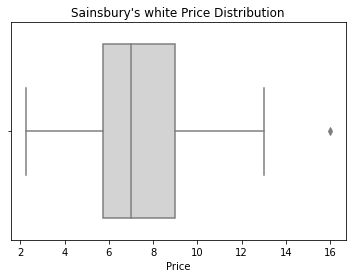

In [334]:
sns.boxplot(x=df_White_wine["Price"],color="lightgrey").set(title="Sainsbury's white Price Distribution")

Creating a dataframa combining the Red & white wine of Sainsbury 

In [335]:
frames = [Sains_red_wine, df_White_wine]
Sains_wines = pd.concat(frames,ignore_index=True)

In [336]:
Sains_wines

Wine_Type                                       Product_Name  Price
0         RED                            19 Crimes Red Wine 75cl    7.5
1         RED                               Diablo Dark Red 75cl   10.0
2         RED                 Apothic Red Winemaker's Blend 75cl    8.0
3         RED                   Carnivor Zinfandel Red Wine 75cl    9.0
4         RED  Sainsbury's Rioja Reserva, Taste the Differenc...    7.5
..        ...                                                ...    ...
229     White      Sainsbury's Taste the Difference Vouvray 75cl    8.0
230     White                         Oyster Bay Pinot Gris 75cl   10.0
231     White                   Barefoot Moscato White Wine 75cl    7.0
232     White  Sainsbury's Vernaccia Di San Gimignano, Taste ...    7.0
233     White  Villa Maria Cellar Selection Sauvignon Blanc 7...   12.0

[234 rows x 3 columns]

In [337]:
Sains_wines.index = np.arange(1, len(Sains_wines) + 1)

In [338]:
Sains_wines

Wine_Type                                       Product_Name  Price
1         RED                            19 Crimes Red Wine 75cl    7.5
2         RED                               Diablo Dark Red 75cl   10.0
3         RED                 Apothic Red Winemaker's Blend 75cl    8.0
4         RED                   Carnivor Zinfandel Red Wine 75cl    9.0
5         RED  Sainsbury's Rioja Reserva, Taste the Differenc...    7.5
..        ...                                                ...    ...
230     White      Sainsbury's Taste the Difference Vouvray 75cl    8.0
231     White                         Oyster Bay Pinot Gris 75cl   10.0
232     White                   Barefoot Moscato White Wine 75cl    7.0
233     White  Sainsbury's Vernaccia Di San Gimignano, Taste ...    7.0
234     White  Villa Maria Cellar Selection Sauvignon Blanc 7...   12.0

[234 rows x 3 columns]

In [339]:
Summary_Statistics=Sains_wines.groupby(['Wine_Type'])[['Price']].describe()
Summary_Statistics

Price                                                 
           count      mean       std   min   25%  50%   75%   max
Wine_Type                                                        
RED        185.0  8.640216  4.478939  1.80  6.00  7.5  10.0  30.0
White       49.0  7.581633  2.642475  2.25  5.75  7.0   9.0  16.0

[Text(0.5, 1.0, 'Sainsbury Wine Price Distribution')]

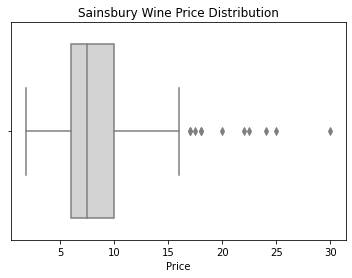

In [340]:
sns.boxplot(x=Sains_wines["Price"],color="lightgrey").set(title="Sainsbury Wine Price Distribution")

[Text(0.5, 1.0, "Sainsbury's Wine Types")]

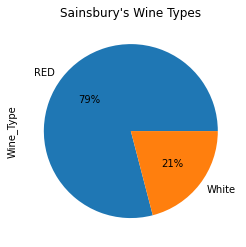

In [341]:
Sains_wines['Wine_Type'].value_counts().plot(kind='pie',autopct='%1.0f%%').set(title="Sainsbury's Wine Types")

# MORRISONS SCRAPE

Defining headers

In [342]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}


Defining HTML

In [343]:
html = requests.get('https://groceries.morrisons.com/search?entry=Wines&clusterPath=beer-wines-spirits-103120,wine-champagne-176432,red-wine-176433')

Defining object

In [344]:
bsobj = soup(html.content,'lxml')

In [345]:
bsobj

<!DOCTYPE html>
<html lang="en-GB"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="en" http-equiv="Content-Language"/><meta content="no-cache" http-equiv="Pragma"/><meta content="Sat, 01 Jan 2000 09:00:00 GMT" http-equiv="Expires"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/><meta content="#004e37" name="theme-color"/><script>
            window.INITIAL_STATE = {"breadcrumbs":{"catalogue":{"childCategories":{},"error":null}},"browserWarnings":{"isUnsupportedBrowserAlertOpen":false,"isOfflineAlertOpen":false,"isOffline":false},"cookieDisclaimer":{"userHidDisclaimer":false},"coupons":{"isInfoSectionCollapsed":true},"deliveryPageScribeDocument":{"isFetching":false,"isReceived":false},"feedbackPopup":{"feedbackOptions":[{"value":"","name":"Please choose a category"}],"hasError":false,"isPopupOpened":false,"isFeedbackSent":false},"footer":{"sectionLinks":[{"sectionLink":{"url":"http:\u

List of URL's

In [346]:
url_list = ['https://groceries.morrisons.com/search?entry=Wines&clusterPath=beer-wines-spirits-103120,wine-champagne-176432,red-wine-176433']

Creating the items

In [347]:

item_names = []
item_rating = []
item_price1 = []

Finding the product name

In [348]:
bsobj.findAll('h4',{'class':'fop-title'})

[<h4 class="fop-title" title="Bells Original Blended Scotch Whisky "><span>Bells Original Blended Scotch Whisky </span><span class="fop-catch-weight-inline">70cl</span></h4>,
 <h4 class="fop-title" title="Tanqueray Gin "><span>Tanqueray Gin </span><span class="fop-catch-weight-inline">1L</span></h4>,
 <h4 class="fop-title" title="Apothic Red Wine"><span>Apothic Red Wine</span><span class="fop-catch-weight-inline">75cl</span></h4>,
 <h4 class="fop-title" title="Haig Clubman Single Grain Whisky     "><span>Haig Clubman Single Grain Whisky     </span><span class="fop-catch-weight-inline">70cl</span></h4>,
 <h4 class="fop-title" title="Aperol Aperitivo"><span>Aperol Aperitivo</span><span class="fop-catch-weight-inline">100cl</span></h4>,
 <h4 class="fop-title" title="Smirnoff Premium Vodka"><span>Smirnoff Premium Vodka</span><span class="fop-catch-weight-inline">1L</span></h4>,
 <h4 class="fop-title" title="Apothic Cabernet Sauvignon Red Wine "><span>Apothic Cabernet Sauvignon Red Wine </s

Finding the element of Price

In [349]:
bsobj.findAll('span',{'class':'fop-price'})

[<span class="fop-price">£17.00</span>,
 <span class="fop-price">£21.99</span>,
 <span class="fop-price">£9.50</span>,
 <span class="fop-price">£16.99</span>,
 <span class="fop-price">£20</span>,
 <span class="fop-price">£17.99</span>,
 <span class="fop-price">£10</span>,
 <span class="fop-price price-offer">£5.49</span>,
 <span class="fop-price">£9</span>,
 <span class="fop-price price-offer">£5.49</span>,
 <span class="fop-price">£10</span>,
 <span class="fop-price">£7.75</span>,
 <span class="fop-price">£2.49</span>,
 <span class="fop-price">£8.50</span>,
 <span class="fop-price price-offer">£6</span>,
 <span class="fop-price price-offer">£6</span>,
 <span class="fop-price price-offer">£5.49</span>,
 <span class="fop-price">£7.50</span>,
 <span class="fop-price price-offer">£12</span>,
 <span class="fop-price price-offer">£8.50</span>,
 <span class="fop-price">£15</span>,
 <span class="fop-price">£9</span>,
 <span class="fop-price">£9</span>,
 <span class="fop-price">£6.75</span>,
 

Making a loop to get all the inputs

In [350]:

for url in url_list:
    result = requests.get(url)
    bsobj = soup(result.content,'lxml')
    
    product_name = bsobj.findAll('h4',{'class':'fop-title'})
    product_price = bsobj.findAll('span',{'class':'fop-price'})
    for names,price in zip(product_name,product_price):
        item_names.append(names.span.text.strip())
        item_price1.append(price.text.strip())
        

Creating a data frame

In [351]:
df = pd.DataFrame.from_dict({'Product_Name':item_names, 'Price':item_price1})
df.insert(0,'Wine_Type','RED')
df
df_redwine = df.transpose()

Checking if there are any duplicate variables

In [352]:
dups = df.duplicated()

In [353]:
print(dups.any())

True


In [354]:
print(df[dups])

   Wine_Type                         Product_Name  Price
57       RED                     Apothic Red Wine  £9.50
58       RED  Apothic Cabernet Sauvignon Red Wine    £10


In [355]:
df.drop_duplicates(inplace=True)
print(df.shape)

(57, 3)


Viewing the data frame

In [356]:
df_red_wine=df_redwine.transpose()
df_red_wine

Wine_Type                                       Product_Name   Price
0        RED               Bells Original Blended Scotch Whisky  £17.00
1        RED                                      Tanqueray Gin  £21.99
2        RED                                   Apothic Red Wine   £9.50
3        RED                   Haig Clubman Single Grain Whisky  £16.99
4        RED                                   Aperol Aperitivo     £20
5        RED                             Smirnoff Premium Vodka  £17.99
6        RED                Apothic Cabernet Sauvignon Red Wine     £10
7        RED                 Rosemount Diamond Selection Shiraz   £5.49
8        RED                                      19 Crimes Red      £9
9        RED               Wolf Blass Red Label Shiraz Cabernet   £5.49
10       RED                    19 Crimes The Uprising Red Wine     £10
11       RED                                    Jam Shed Shiraz   £7.75
12       RED                                 Yellow Tail Shiraz   £2.49
13       RED  Lindemans Gentlemans Collection Cabernet Sauvi...   £8.50
14       RED                                 Yellow Tail Merlot      £6
15       RED                          Yellow Tail Jammy Red Roo      £6
16       RED                                 Most Wanted Shiraz   £5.49
17       RED    Morrisons The Best Australia Cabernet Sauvignon   £7.50
18       RED                          Jam Shed Shiraz Australia     £12
19       RED             Penfolds Koonunga Hill Shiraz Cabernet   £8.50
20       RED     Wolf Blass House Of The Dragon Cabernet Shiraz     £15
21       RED                                    Mad Fish Shiraz      £9
22       RED                                   B. INK Red Blend      £9
23       RED                        McGuigan Black Label Merlot   £6.75
24       RED                        McGuigan Black Label Shiraz   £6.75
25       RED                Hardys Nottage Hill Cabernet Shiraz   £6.75
26       RED                             Hardys Bankside Shiraz   £6.50
27       RED                   The Workshop Wine Company Shiraz   £4.99
28       RED                            McGuigan Bin 578 Merlot   £5.19
29       RED                                 Yellow Tail Shiraz      £7
30       RED                                    The Shy Pig Red   £4.79
31       RED                           McGuigan Black Label Red   £6.75
32       RED                Wolf Blass Vineyards Release Shiraz   £6.50
33       RED                           Lindeman's Bin 50 Shiraz   £6.50
34       RED                                 Yellow Tail Malbec      £7
35       RED                                     Australian Red  £13.50
36       RED                            McGuigan Reserve Shiraz   £7.50
37       RED                         Hardys Nottage Hill Merlot   £6.75
38       RED                McGuigan Reserve Cabernet Sauvignon   £7.50
39       RED                        Workshop Cabernet Sauvignon   £4.99
40       RED         Wolf Blass Yellow Label Cabernet Sauvignon   £8.50
41       RED  Jacob's Creek Double Barrel Matured Shiraz Red...     £12
42       RED                            Workshop Australian Red   £4.79
43       RED                        Mcguigan Black Label Shiraz   £7.50
44       RED                             19 Crimes The Deported     £10
45       RED          Grant Burge Barossa Shiraz 5th Generation     £13
46       RED                                19 Crimes Red Blend     £17
47       RED                     Penfolds Bin 8 Shiraz Cabernet     £21
48       RED           Jacob's Creek Reserve Cabernet Sauvignon      £9
49       RED                    Trivento Private Reserve Malbec     £10
50       RED                            Trivento Reserve Malbec   £8.50
51       RED               Morrisons The Best Uco Valley Malbec     £10
52       RED                      Beefsteak Club Mendoza Malbec      £6
53       RED                         Parrilla By Vinalba Malbec      £9
54       RED                     Trivento G

Removing the pound sign for visualisation

In [357]:
df_red_wine['Price'] = df_red_wine['Price'].str.replace('£', '')

Removing the first 18 rows as it included the advertisment products

In [358]:
df_red_wine_updated = df_red_wine.iloc[18:]

In [359]:
df_red_wine_updated

Wine_Type                                       Product_Name  Price
18       RED                          Jam Shed Shiraz Australia     12
19       RED             Penfolds Koonunga Hill Shiraz Cabernet   8.50
20       RED     Wolf Blass House Of The Dragon Cabernet Shiraz     15
21       RED                                    Mad Fish Shiraz      9
22       RED                                   B. INK Red Blend      9
23       RED                        McGuigan Black Label Merlot   6.75
24       RED                        McGuigan Black Label Shiraz   6.75
25       RED                Hardys Nottage Hill Cabernet Shiraz   6.75
26       RED                             Hardys Bankside Shiraz   6.50
27       RED                   The Workshop Wine Company Shiraz   4.99
28       RED                            McGuigan Bin 578 Merlot   5.19
29       RED                                 Yellow Tail Shiraz      7
30       RED                                    The Shy Pig Red   4.79
31       RED                           McGuigan Black Label Red   6.75
32       RED                Wolf Blass Vineyards Release Shiraz   6.50
33       RED                           Lindeman's Bin 50 Shiraz   6.50
34       RED                                 Yellow Tail Malbec      7
35       RED                                     Australian Red  13.50
36       RED                            McGuigan Reserve Shiraz   7.50
37       RED                         Hardys Nottage Hill Merlot   6.75
38       RED                McGuigan Reserve Cabernet Sauvignon   7.50
39       RED                        Workshop Cabernet Sauvignon   4.99
40       RED         Wolf Blass Yellow Label Cabernet Sauvignon   8.50
41       RED  Jacob's Creek Double Barrel Matured Shiraz Red...     12
42       RED                            Workshop Australian Red   4.79
43       RED                        Mcguigan Black Label Shiraz   7.50
44       RED                             19 Crimes The Deported     10
45       RED          Grant Burge Barossa Shiraz 5th Generation     13
46       RED                                19 Crimes Red Blend     17
47       RED                     Penfolds Bin 8 Shiraz Cabernet     21
48       RED           Jacob's Creek Reserve Cabernet Sauvignon      9
49       RED                    Trivento Private Reserve Malbec     10
50       RED                            Trivento Reserve Malbec   8.50
51       RED               Morrisons The Best Uco Valley Malbec     10
52       RED                      Beefsteak Club Mendoza Malbec      6
53       RED                         Parrilla By Vinalba Malbec      9
54       RED                     Trivento Golden Reserve Malbec     13
55       RED                            Alzar            Malbec   6.25
56       RED                              Morrisons Malbec 75Cl   4.99
57       RED                                   Apothic Red Wine   9.50
58       RED                Apothic Cabernet Sauvignon Red Wine     10

Making the price variable into integer in order to get a visualisation

In [360]:
df_red_wine_updated['Price'] = pd.to_numeric(df_red_wine_updated['Price'])

/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/3311804904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red_wine_updated['Price'] = pd.to_numeric(df_red_wine_updated['Price'])


In [361]:
MORISREDWINE=df_red_wine_updated['Price']

Creating a box plot

[Text(0.5, 1.0, 'Morrisons Red Wine Price Distribution')]

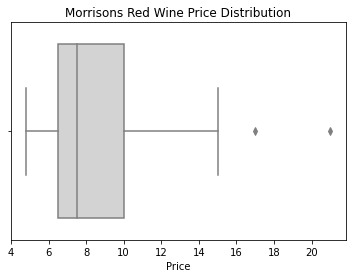

In [362]:
sns.boxplot(data=df_red_wine_updated, x="Price",color="lightgrey").set(title="Morrisons Red Wine Price Distribution")

In [363]:
df_red_wine_updated.describe()

Price
count  41.000000
mean    8.761951
std     3.501808
min     4.790000
25%     6.500000
50%     7.500000
75%    10.000000
max    21.000000

WHITE WINE 

Similar to red wine scraping

In [364]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}


In [365]:
html_white= requests.get('https://groceries.morrisons.com/browse/beer-wines-spirits-103120/wine-champagne-176432/white-wine-176434')

In [366]:
bsobj = soup(html_white.content,'lxml')

In [367]:
bsobj

<!DOCTYPE html>
<html lang="en-GB"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="en" http-equiv="Content-Language"/><meta content="no-cache" http-equiv="Pragma"/><meta content="Sat, 01 Jan 2000 09:00:00 GMT" http-equiv="Expires"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/><meta content="#004e37" name="theme-color"/><script>
            window.INITIAL_STATE = {"breadcrumbs":{"catalogue":{"childCategories":[{"id":"105651","name":"Food.com","children":[{"id":"187106","name":"Christmas","itemCount":10},{"id":"179549","name":"Meat & Poultry","itemCount":12},{"id":"184367","name":"Fish & Seafood","itemCount":4},{"id":"176738","name":"Fruit & Veg","itemCount":7},{"id":"176739","name":"Fresh","itemCount":19},{"id":"102210","name":"Bakery & Cakes","itemCount":16},{"id":"102705","name":"Food Cupboard","itemCount":21},{"id":"180331","name":"Frozen","itemCount":19},{"id":"103644","name":"D

In [368]:
url_list_white = ['https://groceries.morrisons.com/browse/beer-wines-spirits-103120/wine-champagne-176432/white-wine-176434']

In [369]:
item_names = []
item_price2 = []

In [370]:
bsobj.findAll('h4',{'class':'fop-title'})

[<h4 class="fop-title" title="Morrisons The Best South African Sauvignon Blanc"><span>Morrisons The Best South African Sauvignon Blanc</span><span class="fop-catch-weight-inline">75cl</span></h4>,
 <h4 class="fop-title" title="Morrisons The Best Marlborough Sauvignon Blanc "><span>Morrisons The Best Marlborough Sauvignon Blanc </span><span class="fop-catch-weight-inline">75cl</span></h4>,
 <h4 class="fop-title" title="The Ned Sauvignon Blanc "><span>The Ned Sauvignon Blanc </span><span class="fop-catch-weight-inline">75cl</span></h4>,
 <h4 class="fop-title" title="Mud House Chile Sauvignon Blanc"><span>Mud House Chile Sauvignon Blanc</span><span class="fop-catch-weight-inline">75cl</span></h4>,
 <h4 class="fop-title" title="Villa Maria Private Bin Sauvignon Blanc"><span>Villa Maria Private Bin Sauvignon Blanc</span><span class="fop-catch-weight-inline">75cl</span></h4>,
 <h4 class="fop-title" title="Mud House Marlborough Sauvignon Blanc  "><span>Mud House Marlborough Sauvignon Blanc  <

In [371]:
bsobj.findAll('span',{'class':'fop-price'})

[<span class="fop-price">£7.50</span>,
 <span class="fop-price">£9</span>,
 <span class="fop-price">£10</span>,
 <span class="fop-price price-offer">£5.99</span>,
 <span class="fop-price">£10.50</span>,
 <span class="fop-price">£9</span>,
 <span class="fop-price price-offer">£5.49</span>,
 <span class="fop-price">£7.25</span>,
 <span class="fop-price price-offer">£6</span>,
 <span class="fop-price price-offer">£6</span>,
 <span class="fop-price">£9</span>,
 <span class="fop-price">£10</span>,
 <span class="fop-price">£8</span>,
 <span class="fop-price price-offer">£7.99</span>,
 <span class="fop-price price-offer">£6</span>,
 <span class="fop-price price-offer">£5.75</span>,
 <span class="fop-price price-offer">£6.50</span>,
 <span class="fop-price">£2.25</span>,
 <span class="fop-price">£7.25</span>,
 <span class="fop-price">£8.50</span>,
 <span class="fop-price">£8</span>,
 <span class="fop-price">£7.75</span>,
 <span class="fop-price price-offer">£6.50</span>,
 <span class="fop-pric

In [372]:
for url in url_list_white:
    result = requests.get(url)
    bsobj = soup(result.content,'lxml')
    
    product_name = bsobj.findAll('h4',{'class':'fop-title'})
    product_price = bsobj.findAll('span',{'class':'fop-price'})
    for names,price in zip(product_name,product_price):
        item_names.append(names.span.text.strip())
        item_price2.append(price.text.strip())

In [373]:
df_white_wine = pd.DataFrame.from_dict({'Product_Name':item_names, 'Price':item_price2})
df_white_wine.insert(0,'Wine_Type','WHITE')
df_white_wine


Wine_Type                                       Product_Name   Price
0      WHITE   Morrisons The Best South African Sauvignon Blanc   £7.50
1      WHITE     Morrisons The Best Marlborough Sauvignon Blanc      £9
2      WHITE                            The Ned Sauvignon Blanc     £10
3      WHITE                    Mud House Chile Sauvignon Blanc   £5.99
4      WHITE            Villa Maria Private Bin Sauvignon Blanc  £10.50
5      WHITE              Mud House Marlborough Sauvignon Blanc      £9
6      WHITE             Rosemount Diamond Selection Chardonnay   £5.49
7      WHITE           Morrisons The Best Trentino Pinot Grigio   £7.25
8      WHITE                      Jam Shed Chardonnay Australia      £6
9      WHITE                           Yellow Tail Pinot Grigio      £6
10     WHITE                            Morrisons The Best Gavi      £9
11     WHITE                      Squealing Pig Sauvignon Blanc     £10
12     WHITE                    Morrisons The Best Chenin Blanc      £8
13     WHITE                   Yealands Reserve Sauvignon Blanc   £7.99
14     WHITE                       Chapmans Bay Sauvignon Blanc      £6
15     WHITE                Cono Sur Bicicleta  Sauvignon Blanc   £5.75
16     WHITE                 Wolf Blass Yellow Label Chardonnay   £6.50
17     WHITE              Mcguigan Black Label Chardonnay 187Ml   £2.25
18     WHITE                        Morrisons The Best Pecorino   £7.25
19     WHITE    Morrisons The Best Western Australia Chardonnay   £8.50
20     WHITE  Morrisons The Best Marques de los Rios Rioja B...      £8
21     WHITE                      Morrisons The Best Chardonnay   £7.75
22     WHITE       Casillero del Diablo Reserva Sauvignon Blanc   £6.50
23     WHITE     Gallo Family Vineyards Pinot Grigio White Wine   £5.75
24     WHITE                               19 Crimes Chardonnay      £9
25     WHITE                Morrisons The Best Gruner Veltliner   £8.75
26     WHITE                           Yellow Tail Pinot Grigio   £2.49
27     WHITE  Morrisons The Best Muscadet Serve Et Maine Sur...   £8.50
28     WHITE                      Morrisons The Best Verdicchio   £7.25
29     WHITE                  Morrisons The Best Soave Classico   £7.75
30     WHITE                   Dark Horse Chardonnay White Wine      £7
31     WHITE                              Oyster Bay Chardonnay   £7.99
32     WHITE                      Morrisons The Best Falanghina   £7.50
33     WHITE                Barefoot Sauvignon Blanc White Wine      £6
34     WHITE                       Zalze Bush Vine Chenin Blanc      £6
35     WHITE                        Morrisons The Best Riesling   £8.50
36     WHITE                         Morrisons The Best Vouvray     £10
37     WHITE     Morrisons The Best Pinot Grigio Alto Adige Doc     £10
38     WHITE                                Italia Pinot Grigio   £7.50
39     WHITE              Morrisons The Best Touraine Sauvignon      £9
40     WHITE                Zarper Sauvignon Blanc Gran Reserva   £6.50
41     WHITE                        Head Honcho Sauvignon Blanc      £2
42     WHITE     Morrisons The Best Vinho Verde 'Loureiro' Wine   £8.75
43     WHITE  Brancott Estate Terroir Series Reserve Sauvign...      £9
44     WHITE                     Gary Barlow Organic White Wine      £6
45     WHITE           Morrisons The Best Alsace Gewurztraminer     £10
46     WHITE                      Morrisons The Best Pinot Gris      £9
47     WHITE                               I Heart Pinot Grigio   £2.25
48     WHITE                     Morrisons Organic Pinot Grigio   £7.25
49     WHITE                    Morrisons The Best Pouilly Fume     £14

In [374]:
df_white_wine

Wine_Type                                       Product_Name   Price
0      WHITE   Morrisons The Best South African Sauvignon Blanc   £7.50
1      WHITE     Morrisons The Best Marlborough Sauvignon Blanc      £9
2      WHITE                            The Ned Sauvignon Blanc     £10
3      WHITE                    Mud House Chile Sauvignon Blanc   £5.99
4      WHITE            Villa Maria Private Bin Sauvignon Blanc  £10.50
5      WHITE              Mud House Marlborough Sauvignon Blanc      £9
6      WHITE             Rosemount Diamond Selection Chardonnay   £5.49
7      WHITE           Morrisons The Best Trentino Pinot Grigio   £7.25
8      WHITE                      Jam Shed Chardonnay Australia      £6
9      WHITE                           Yellow Tail Pinot Grigio      £6
10     WHITE                            Morrisons The Best Gavi      £9
11     WHITE                      Squealing Pig Sauvignon Blanc     £10
12     WHITE                    Morrisons The Best Chenin Blanc      £8
13     WHITE                   Yealands Reserve Sauvignon Blanc   £7.99
14     WHITE                       Chapmans Bay Sauvignon Blanc      £6
15     WHITE                Cono Sur Bicicleta  Sauvignon Blanc   £5.75
16     WHITE                 Wolf Blass Yellow Label Chardonnay   £6.50
17     WHITE              Mcguigan Black Label Chardonnay 187Ml   £2.25
18     WHITE                        Morrisons The Best Pecorino   £7.25
19     WHITE    Morrisons The Best Western Australia Chardonnay   £8.50
20     WHITE  Morrisons The Best Marques de los Rios Rioja B...      £8
21     WHITE                      Morrisons The Best Chardonnay   £7.75
22     WHITE       Casillero del Diablo Reserva Sauvignon Blanc   £6.50
23     WHITE     Gallo Family Vineyards Pinot Grigio White Wine   £5.75
24     WHITE                               19 Crimes Chardonnay      £9
25     WHITE                Morrisons The Best Gruner Veltliner   £8.75
26     WHITE                           Yellow Tail Pinot Grigio   £2.49
27     WHITE  Morrisons The Best Muscadet Serve Et Maine Sur...   £8.50
28     WHITE                      Morrisons The Best Verdicchio   £7.25
29     WHITE                  Morrisons The Best Soave Classico   £7.75
30     WHITE                   Dark Horse Chardonnay White Wine      £7
31     WHITE                              Oyster Bay Chardonnay   £7.99
32     WHITE                      Morrisons The Best Falanghina   £7.50
33     WHITE                Barefoot Sauvignon Blanc White Wine      £6
34     WHITE                       Zalze Bush Vine Chenin Blanc      £6
35     WHITE                        Morrisons The Best Riesling   £8.50
36     WHITE                         Morrisons The Best Vouvray     £10
37     WHITE     Morrisons The Best Pinot Grigio Alto Adige Doc     £10
38     WHITE                                Italia Pinot Grigio   £7.50
39     WHITE              Morrisons The Best Touraine Sauvignon      £9
40     WHITE                Zarper Sauvignon Blanc Gran Reserva   £6.50
41     WHITE                        Head Honcho Sauvignon Blanc      £2
42     WHITE     Morrisons The Best Vinho Verde 'Loureiro' Wine   £8.75
43     WHITE  Brancott Estate Terroir Series Reserve Sauvign...      £9
44     WHITE                     Gary Barlow Organic White Wine      £6
45     WHITE           Morrisons The Best Alsace Gewurztraminer     £10
46     WHITE                      Morrisons The Best Pinot Gris      £9
47     WHITE                               I Heart Pinot Grigio   £2.25
48     WHITE                     Morrisons Organic Pinot Grigio   £7.25
49     WHITE                    Morrisons The Best Pouilly Fume     £14

In [375]:
dups = df.duplicated()

In [376]:
print(dups.any())

False


In [377]:
df_white_wine["Price"] = df_white_wine["Price"].str.replace('£', '')

In [378]:
df_white_wine['Price'] = pd.to_numeric(df_white_wine['Price'])

In [379]:
df_white_wine   

Wine_Type                                       Product_Name  Price
0      WHITE   Morrisons The Best South African Sauvignon Blanc   7.50
1      WHITE     Morrisons The Best Marlborough Sauvignon Blanc   9.00
2      WHITE                            The Ned Sauvignon Blanc  10.00
3      WHITE                    Mud House Chile Sauvignon Blanc   5.99
4      WHITE            Villa Maria Private Bin Sauvignon Blanc  10.50
5      WHITE              Mud House Marlborough Sauvignon Blanc   9.00
6      WHITE             Rosemount Diamond Selection Chardonnay   5.49
7      WHITE           Morrisons The Best Trentino Pinot Grigio   7.25
8      WHITE                      Jam Shed Chardonnay Australia   6.00
9      WHITE                           Yellow Tail Pinot Grigio   6.00
10     WHITE                            Morrisons The Best Gavi   9.00
11     WHITE                      Squealing Pig Sauvignon Blanc  10.00
12     WHITE                    Morrisons The Best Chenin Blanc   8.00
13     WHITE                   Yealands Reserve Sauvignon Blanc   7.99
14     WHITE                       Chapmans Bay Sauvignon Blanc   6.00
15     WHITE                Cono Sur Bicicleta  Sauvignon Blanc   5.75
16     WHITE                 Wolf Blass Yellow Label Chardonnay   6.50
17     WHITE              Mcguigan Black Label Chardonnay 187Ml   2.25
18     WHITE                        Morrisons The Best Pecorino   7.25
19     WHITE    Morrisons The Best Western Australia Chardonnay   8.50
20     WHITE  Morrisons The Best Marques de los Rios Rioja B...   8.00
21     WHITE                      Morrisons The Best Chardonnay   7.75
22     WHITE       Casillero del Diablo Reserva Sauvignon Blanc   6.50
23     WHITE     Gallo Family Vineyards Pinot Grigio White Wine   5.75
24     WHITE                               19 Crimes Chardonnay   9.00
25     WHITE                Morrisons The Best Gruner Veltliner   8.75
26     WHITE                           Yellow Tail Pinot Grigio   2.49
27     WHITE  Morrisons The Best Muscadet Serve Et Maine Sur...   8.50
28     WHITE                      Morrisons The Best Verdicchio   7.25
29     WHITE                  Morrisons The Best Soave Classico   7.75
30     WHITE                   Dark Horse Chardonnay White Wine   7.00
31     WHITE                              Oyster Bay Chardonnay   7.99
32     WHITE                      Morrisons The Best Falanghina   7.50
33     WHITE                Barefoot Sauvignon Blanc White Wine   6.00
34     WHITE                       Zalze Bush Vine Chenin Blanc   6.00
35     WHITE                        Morrisons The Best Riesling   8.50
36     WHITE                         Morrisons The Best Vouvray  10.00
37     WHITE     Morrisons The Best Pinot Grigio Alto Adige Doc  10.00
38     WHITE                                Italia Pinot Grigio   7.50
39     WHITE              Morrisons The Best Touraine Sauvignon   9.00
40     WHITE                Zarper Sauvignon Blanc Gran Reserva   6.50
41     WHITE                        Head Honcho Sauvignon Blanc   2.00
42     WHITE     Morrisons The Best Vinho Verde 'Loureiro' Wine   8.75
43     WHITE  Brancott Estate Terroir Series Reserve Sauvign...   9.00
44     WHITE                     Gary Barlow Organic White Wine   6.00
45     WHITE           Morrisons The Best Alsace Gewurztraminer  10.00
46     WHITE                      Morrisons The Best Pinot Gris   9.00
47     WHITE                               I Heart Pinot Grigio   2.25
48     WHITE                     Morrisons Organic Pinot Grigio   7.25
49     WHITE                    Morrisons The Best Pouilly Fume  14.00

[Text(0.5, 1.0, 'Morrisons White Wine Price Distribution')]

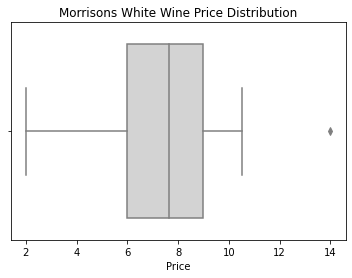

In [380]:
sns.boxplot(data=df_white_wine, x="Price",color="lightgrey").set(title="Morrisons White Wine Price Distribution")

MERGING THE DATA

In [381]:
frames = [df_red_wine, df_white_wine]
MORIS_wines = pd.concat(frames,ignore_index=True)

In [382]:
MORIS_wines

Wine_Type                              Product_Name  Price
0         RED      Bells Original Blended Scotch Whisky  17.00
1         RED                             Tanqueray Gin  21.99
2         RED                          Apothic Red Wine   9.50
3         RED          Haig Clubman Single Grain Whisky  16.99
4         RED                          Aperol Aperitivo     20
..        ...                                       ...    ...
104     WHITE  Morrisons The Best Alsace Gewurztraminer   10.0
105     WHITE             Morrisons The Best Pinot Gris    9.0
106     WHITE                      I Heart Pinot Grigio   2.25
107     WHITE            Morrisons Organic Pinot Grigio   7.25
108     WHITE           Morrisons The Best Pouilly Fume   14.0

[109 rows x 3 columns]

In [383]:
MORIS_wines.index = np.arange(1, len(MORIS_wines) + 1)

In [384]:
MORIS_Statistics=MORIS_wines.groupby(['Wine_Type'])[['Price']].describe()
MORIS_Statistics

Price                 
          count unique  top freq
Wine_Type                       
RED          59     27   10    6
WHITE      50.0   20.0  9.0  7.0

[Text(0.5, 1.0, "Morrisons's Wine Type")]

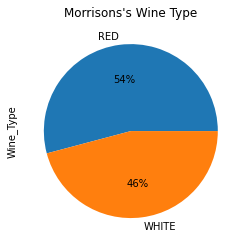

In [385]:
MORIS_wines['Wine_Type'].value_counts().plot(kind='pie',autopct='%1.0f%%').set(title="Morrisons's Wine Type")


# WHISKEY EXCHANGE SCRAPE

In [386]:
baseurl = "https://www.thewhiskyexchange.com"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}

k = requests.get('https://www.thewhiskyexchange.com/c/465/red-wine').text
soup=BeautifulSoup(k,'html.parser')
productlist = soup.find_all("li",{"class":"product-grid__item"})
print(productlist)

productlinks = []
for product in productlist:
        link = product.find("a",{"class":"product-card"}).get('href')                 
productlinks.append(baseurl + link)

productlinks = []
for x in range(1,25):  
 k = requests.get('https://www.thewhiskyexchange.com/c/465/red-wine?pg={}&psize=24&sort=pasc'.format(x)).text  
 soup=BeautifulSoup(k,'html.parser')  
 productlist = soup.find_all("li",{"class":"product-grid__item"})
 
for product in productlist:
        link = product.find("a",{"class":"product-card"}).get('href')
        productlinks.append(baseurl + link)
        
data=[]
for link in productlinks:
    f = requests.get(link,headers=headers).text
    hun=BeautifulSoup(f,'html.parser')

    try:
        price=hun.find("p",{"class":"product-card__price"}).text.replace('\n',"")
    except:
        price = None

    try:
        about=hun.find("div",{"class":"product-main__description"}).text.replace('\n',"")
    except:
        about=None

    try:
        rating = hun.find("div",{"class":"review-overview"}).text.replace('\n',"")
    except:
        rating=None

    try:
        name=hun.find("h1",{"class":"product-main__name"}).text.replace('\n',"")
    except:
        name=None

    wine = {"name":name,"price":price,"rating":rating,"about":about}

    data.append(wine)


WE_red_wine= pd.DataFrame(data)
WE_red_wine.insert(0,'Wine_Type','RED')
WE_red_wine

[<li class="product-grid__item"><a class="product-card" href="/p/65533/biscarelle-chateauneuf-du-pape-2019" onclick="_gaq.push(['_trackEvent', 'Products-GridView', 'click', '65533 : Biscarelle Chateauneuf Du Pape 2019'])" title="Biscarelle Chateauneuf Du Pape 2019"><div class="product-card__image-container"><img alt="Biscarelle Chateauneuf Du Pape 2019" class="product-card__image" height="4" loading="lazy" src="https://img.thewhiskyexchange.com/480/wine_bis2019.jpg" width="3"/></div><div class="product-card__content"><p class="product-card__name"> Biscarelle Chateauneuf Du Pape 2019 </p><p class="product-card__meta"> 75cl / 14.5% </p></div><div class="product-card__data"><p class="product-card__price"> £34.95 </p><p class="product-card__unit-price"> (£46.60 per litre) </p></div></a></li>, <li class="product-grid__item"><a class="product-card" href="/p/66546/ortonese-sangiovese-merlot-2021" onclick="_gaq.push(['_trackEvent', 'Products-GridView', 'click', '66546 : Ortonese Sangiovese Mer

Wine_Type                                               name    price  \
0        RED  Beaujolais Village Domaine Andre Colonge 2020H...   £12.45   
1        RED  Lionheart of the Barossa Shiraz 2019Dandelion ...   £13.95   
2        RED        Carinena Rojo Kalius 22 Bodegas Monfil 2019    £8.95   
3        RED                      Mezzogiorno Nero d'Avola 2020   £10.95   
4        RED                  Bergerie de la Bastide Rouge 2020    £8.45   
5        RED                         Normanno Ciello Rosso 2020   £35.95   
6        RED                Syrah Grenache Grange des Rocs 2019    £8.95   
7        RED  Moulin de Gassac Classic Rouge Mas de Daumas 2021    £9.25   
8        RED                    Ortonese Sangiovese Merlot 2021  £35.95    
9        RED                         Pago de Tharsys Bobal 2020   £10.95   
10       RED             Catalans Rouge 2020Les Chiens Catalans    £8.95   
11       RED                    Castano Organic Monastrell 2020     None   
12       RED               Jumilla Bodegas Olivares Tinto 2018      None   
13       RED                   Percheron Old Vine Cinsault 2019   £20.95   
14       RED            Le Petite Syrah Domaine Mas Montel 2020    £8.95   
15       RED                          Bosman Grenache Noir 2020   £35.95   
16       RED                                Samurai Shiraz 2021   £19.75   
17       RED    Dominio de Fontana Tempranillo Syrah Roble 2019    £8.25   
18       RED                        El Otro Garnacha Syrah 2021   £10.45   
19       RED                  The Listening Station Shiraz 2021   £10.75   
20       RED                        Soldier's Block Shiraz 2021    £9.25   
21       RED           La Chapelle de Marin Cotes du Rhone 2020   £38.25   
22       RED  El Escoces Volante La Multa Old Vine Garnacha ...     None   
23       RED           Tragolargo Monastrell Casa Balaguer 2020   £12.25   

   rating                                              about  
0    None  Andre Colonge in the heart of Beaujolais is ru...  
1    None  A half-bottle of the 2019-vintage Lionheart of...  
2    None  Situated in the north east of Spain on the Ebr...  
3    None  Sicily is known for its delicious cuisine, bea...  
4    None  Bergerie de la Bastide Rouge is a blend of Gre...  
5    None  Normanno Ciello Rosso is a perfect house wine ...  
6    None  A lively and fruity 2019 Syrah Grenache from G...  
7    None  When the Guibert family discovered this land t...  
8    None  Caldora winery is located in the coastal town ...  
9    None  Pago de Tharsys are widely recognized as one o...  
10   None  Juicy red fruits with a hint of liquorice and ...  
11   None  A rich and fruity Spanish red wine from Castan...  
12   None  A fruity, peppery blend of Monastrell, Grenach...  
13   None  This easy drinking red from old vine Cinsault ...  
14   None  From the Gard region in the north east of the ...  
15   None  The 2020 Grenache Noir from Bosman Family Vine...  
16   None  The 2021 vintage Samurai Shiraz from South Aus...  
17   None  The 2019 vintage Temptranillo Syrah Roble from...  
18   None  This is a family owned winery founded in 2003 ...  
19   None  Victoria’s cooler climate ensures the grapes u...  
20   None  The Soldier's Block wines are named after an A...  
21   None  The 2020-vintage La Chapelle de Marin Cotes du...  
22   None  Norrel Robertson MW is a Scotsman who learnt h...  
23   None  Finca Casa Balaguer are a small family run win...

PRINTING THE DATAFRAME FOR RED WINES 

In [387]:
WE_red_wine

Wine_Type                                               name    price  \
0        RED  Beaujolais Village Domaine Andre Colonge 2020H...   £12.45   
1        RED  Lionheart of the Barossa Shiraz 2019Dandelion ...   £13.95   
2        RED        Carinena Rojo Kalius 22 Bodegas Monfil 2019    £8.95   
3        RED                      Mezzogiorno Nero d'Avola 2020   £10.95   
4        RED                  Bergerie de la Bastide Rouge 2020    £8.45   
5        RED                         Normanno Ciello Rosso 2020   £35.95   
6        RED                Syrah Grenache Grange des Rocs 2019    £8.95   
7        RED  Moulin de Gassac Classic Rouge Mas de Daumas 2021    £9.25   
8        RED                    Ortonese Sangiovese Merlot 2021  £35.95    
9        RED                         Pago de Tharsys Bobal 2020   £10.95   
10       RED             Catalans Rouge 2020Les Chiens Catalans    £8.95   
11       RED                    Castano Organic Monastrell 2020     None   
12       RED               Jumilla Bodegas Olivares Tinto 2018      None   
13       RED                   Percheron Old Vine Cinsault 2019   £20.95   
14       RED            Le Petite Syrah Domaine Mas Montel 2020    £8.95   
15       RED                          Bosman Grenache Noir 2020   £35.95   
16       RED                                Samurai Shiraz 2021   £19.75   
17       RED    Dominio de Fontana Tempranillo Syrah Roble 2019    £8.25   
18       RED                        El Otro Garnacha Syrah 2021   £10.45   
19       RED                  The Listening Station Shiraz 2021   £10.75   
20       RED                        Soldier's Block Shiraz 2021    £9.25   
21       RED           La Chapelle de Marin Cotes du Rhone 2020   £38.25   
22       RED  El Escoces Volante La Multa Old Vine Garnacha ...     None   
23       RED           Tragolargo Monastrell Casa Balaguer 2020   £12.25   

   rating                                              about  
0    None  Andre Colonge in the heart of Beaujolais is ru...  
1    None  A half-bottle of the 2019-vintage Lionheart of...  
2    None  Situated in the north east of Spain on the Ebr...  
3    None  Sicily is known for its delicious cuisine, bea...  
4    None  Bergerie de la Bastide Rouge is a blend of Gre...  
5    None  Normanno Ciello Rosso is a perfect house wine ...  
6    None  A lively and fruity 2019 Syrah Grenache from G...  
7    None  When the Guibert family discovered this land t...  
8    None  Caldora winery is located in the coastal town ...  
9    None  Pago de Tharsys are widely recognized as one o...  
10   None  Juicy red fruits with a hint of liquorice and ...  
11   None  A rich and fruity Spanish red wine from Castan...  
12   None  A fruity, peppery blend of Monastrell, Grenach...  
13   None  This easy drinking red from old vine Cinsault ...  
14   None  From the Gard region in the north east of the ...  
15   None  The 2020 Grenache Noir from Bosman Family Vine...  
16   None  The 2021 vintage Samurai Shiraz from South Aus...  
17   None  The 2019 vintage Temptranillo Syrah Roble from...  
18   None  This is a family owned winery founded in 2003 ...  
19   None  Victoria’s cooler climate ensures the grapes u...  
20   None  The Soldier's Block wines are named after an A...  
21   None  The 2020-vintage La Chapelle de Marin Cotes du...  
22   None  Norrel Robertson MW is a Scotsman who learnt h...  
23   None  Finca Casa Balaguer are a small family run win...

In [388]:
WE_RED_wine=WE_red_wine.drop(columns=['rating', 'about'])

In [389]:
WE_red_wine['price'] = WE_red_wine['price'].str.replace('£', '')

In [390]:
WE_red_wine['price'] = pd.to_numeric(WE_red_wine['price'])

[Text(0.5, 1.0, ' Whiskey Exchange Red Wine Price Distribution')]

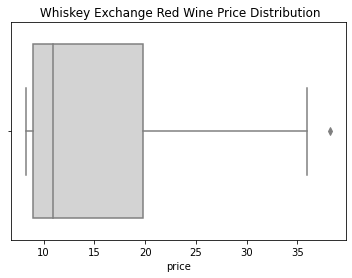

In [391]:
sns.boxplot(data=WE_red_wine, x="price",color="lightgrey").set(title=" Whiskey Exchange Red Wine Price Distribution")

 WHITE WINES SCRAPE

In [392]:

baseurl = "https://www.thewhiskyexchange.com"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}
productlinks = []
t={}
data=[]
c=0
for x in range(2):
    k = requests.get('https://www.thewhiskyexchange.com/c/1094/white-wine'.format(x)).text
    soup=BeautifulSoup(k,'html.parser')
    productlist = soup.find_all("li",{"class":"product-grid__item"})


    for product in productlist:
        link = product.find("a",{"class":"product-card"}).get('href')
        productlinks.append(baseurl + link)


for link in productlinks:
    f = requests.get(link,headers=headers).text
    hun=BeautifulSoup(f,'html.parser')

    try:
        price=hun.find("p",{"class":"product-action__price"}).text.replace('\n',"")
    except:
        price = None

    try:
        about=hun.find("div",{"class":"product-main__description"}).text.replace('\n',"")
    except:
        about=None

    try:
        rating = hun.find("div",{"class":"review-overview"}).text.replace('\n',"")
    except:
        rating=None

    try:
        name=hun.find("h1",{"class":"product-main__name"}).text.replace('\n',"")
    except:
        name=None

    white_wines = {"name":name,"price":price,"rating":rating,"about":about}

    data.append(white_wines)
    c=c+1
    print("completed",c)
    
    
WE_white_wine = pd.DataFrame(data)
WE_white_wine.insert(0,'Wine_Type','WHITE')

print(WE_white_wine)

completed 1
completed 2
completed 3
completed 4
completed 5
completed 6
completed 7
completed 8
completed 9
completed 10
completed 11
completed 12
completed 13
completed 14
completed 15
completed 16
completed 17
completed 18
completed 19
completed 20
completed 21
completed 22
completed 23
completed 24
completed 25
completed 26
completed 27
completed 28
completed 29
completed 30
completed 31
completed 32
completed 33
completed 34
completed 35
completed 36
completed 37
completed 38
completed 39
completed 40
completed 41
completed 42
completed 43
completed 44
completed 45
completed 46
completed 47
completed 48
   Wine_Type                                               name   price  \
0      WHITE                      Gasper Chardonnay Rebula 2020  £11.95   
1      WHITE  Moulin de Gassac Classic Blanc Mas de Daumas 2021   £9.25   
2      WHITE              The Listening Station Chardonnay 2021  £10.75   
3      WHITE        La Bota De Florpower 107 MMXXEquipo Navazos  £26.95   
4      WHI

DATA-FRAME FOR WHITE WINES

In [393]:
WE_white_wine

Wine_Type                                               name   price  \
0      WHITE                      Gasper Chardonnay Rebula 2020  £11.95   
1      WHITE  Moulin de Gassac Classic Blanc Mas de Daumas 2021   £9.25   
2      WHITE              The Listening Station Chardonnay 2021  £10.75   
3      WHITE        La Bota De Florpower 107 MMXXEquipo Navazos  £26.95   
4      WHITE  Chablis 1er Cru Cote de Jouan 2019Domaine Garnier  £34.95   
5      WHITE                 The Crossings Sauvignon Blanc 2021  £12.25   
6      WHITE  Domaine Andre Vatan Sancerre Les Perriers 2021...  £13.95   
7      WHITE                           Soalheiro Alvarinho 2021  £17.95   
8      WHITE            Lagar De Costa Albarino 2021Rias Baixas  £16.95   
9      WHITE                             Tikves Smederevka 2020   £8.95   
10     WHITE                     Ca'di Ponti Grillo Sicily 2021   £8.95   
11     WHITE                      Reuilly Domaine Mabillot 2020  £18.95   
12     WHITE         Grace Koshu Hishiyama 2020 Private Reserve  £23.75   
13     WHITE  Riesling Frankstein Grand Cru Domaine Beck-Har...  £29.95   
14     WHITE   Pouilly Fuisse Les Crays 2020Domaine Eric Forest  £39.95   
15     WHITE             Lyrarakis Dafni Psarades Vineyard 2021  £12.95   
16     WHITE       La Belle Etoile Sauvignon Blanc Astrale 2021  £10.95   
17     WHITE     Riesling Glintzberg 2021Domaine Roland Schmitt  £18.95   
18     WHITE             Dona Paula Sauvignon Blanc 2021Mendoza  £10.25   
19     WHITE        Balthasar Ress Von Unserm Dry Riesling 2021  £19.25   
20     WHITE              Chablis Les Serres Domaine Oudin 2019  £29.95   
21     WHITE                         Bodegas Nekeas Blanco 2021  £13.75   
22     WHITE                  Terlan Winkl Sauvignon Blanc 2021  £22.95   
23     WHITE     Testalonga El Bandito Cortez Chenin Blanc 2021  £26.95   
24     WHITE                      Gasper Chardonnay Rebula 2020  £11.95   
25     WHITE  Moulin de Gassac Classic Blanc Mas de Daumas 2021   £9.25   
26     WHITE              The Listening Station Chardonnay 2021  £10.75   
27     WHITE        La Bota De Florpower 107 MMXXEquipo Navazos  £26.95   
28     WHITE  Chablis 1er Cru Cote de Jouan 2019Domaine Garnier  £34.95   
29     WHITE                 The Crossings Sauvignon Blanc 2021  £12.25   
30     WHITE  Domaine Andre Vatan Sancerre Les Perriers 2021...  £13.95   
31     WHITE                           Soalheiro Alvarinho 2021  £17.95   
32     WHITE            Lagar De Costa Albarino 2021Rias Baixas  £16.95   
33     WHITE                             Tikves Smederevka 2020   £8.95   
34     WHITE                     Ca'di Ponti Grillo Sicily 2021   £8.95   
35     WHITE                      Reuilly Domaine Mabillot 2020  £18.95   
36     WHITE         Grace Koshu Hishiyama 2020 Private Reserve  £23.75   
37     WHITE  Riesling Frankstein Grand Cru Domaine Beck-Har...  £29.95   
38     WHITE   Pouilly Fuisse Les Crays 2020Domaine Eric Forest  £39.95   
39     WHITE             Lyrarakis Dafni Psarades Vineyard 2021  £12.95   
40     WHITE       La Belle Etoile Sauvignon Blanc Astrale 2021  £10.95   
41     WHITE     Riesling Glintzberg 2021Domaine Roland Schmitt  £18.95   
42     WHITE             Dona Paula Sauvignon Blanc 2021Mendoza  £10.25   
43     WHITE        Balthasar Ress Von Unserm Dry Riesling 2021  £19.25   
44     WHITE              Chablis Les Serres Domaine Oudin 2019  £29.95   
45     WHITE                         Bodegas Nekeas Blanco 2021  £13.75   
46     WHITE                  Terlan Winkl Sauvignon Blanc 2021  £22.95   
47     WHITE     Testalonga El Bandito Cortez Chenin Blanc 2021  £26.95   

   rating                                              about  
0    None  This is a blend of Ribolla Gialla (an ancient ...  
1    None  When the Guibert family discovered this land t...  
2    None  This unoaked Chardonnay from Victoria in Austr...  
3    None  La Bota 107 De Florpower MMXX is an unfortifie...  
4    None  C

In [394]:
WE_white_wine['price'] = WE_white_wine['price'].str.replace('£', '')

In [395]:
WE_white_wine['price'] = pd.to_numeric(WE_white_wine['price'])

[Text(0.5, 1.0, ' Whiskey Exchange White Wine Price Distribution')]

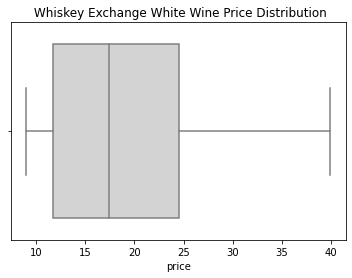

In [396]:
sns.boxplot(data=WE_white_wine, x="price",color="lightgrey").set(title=" Whiskey Exchange White Wine Price Distribution")

MERGING AND CLEANINGTHE DATA FRAMES

In [397]:
frames = [WE_red_wine, WE_white_wine]
WE_wines = pd.concat(frames,ignore_index=True)

In [398]:
WE_wines

Wine_Type                                               name  price rating  \
0        RED  Beaujolais Village Domaine Andre Colonge 2020H...  12.45   None   
1        RED  Lionheart of the Barossa Shiraz 2019Dandelion ...  13.95   None   
2        RED        Carinena Rojo Kalius 22 Bodegas Monfil 2019   8.95   None   
3        RED                      Mezzogiorno Nero d'Avola 2020  10.95   None   
4        RED                  Bergerie de la Bastide Rouge 2020   8.45   None   
..       ...                                                ...    ...    ...   
67     WHITE        Balthasar Ress Von Unserm Dry Riesling 2021  19.25   None   
68     WHITE              Chablis Les Serres Domaine Oudin 2019  29.95   None   
69     WHITE                         Bodegas Nekeas Blanco 2021  13.75   None   
70     WHITE                  Terlan Winkl Sauvignon Blanc 2021  22.95   None   
71     WHITE     Testalonga El Bandito Cortez Chenin Blanc 2021  26.95   None   

                                                about  
0   Andre Colonge in the heart of Beaujolais is ru...  
1   A half-bottle of the 2019-vintage Lionheart of...  
2   Situated in the north east of Spain on the Ebr...  
3   Sicily is known for its delicious cuisine, bea...  
4   Bergerie de la Bastide Rouge is a blend of Gre...  
..                                                ...  
67  Balthasar Ress has been a firm favourite for m...  
68  Honey, almond and marmalade on the nose. The p...  
69  The vines for this wine are grown on impossibl...  
70  Wonderfully juicy Sauvignon Blanc from old vin...  
71  A very smart Chenin Blanc from South African n...  

[72 rows x 5 columns]

In [399]:
WE_wines.index = np.arange(1, len(WE_wines) + 1)

In [400]:
WE_wines

Wine_Type                                               name  price rating  \
1        RED  Beaujolais Village Domaine Andre Colonge 2020H...  12.45   None   
2        RED  Lionheart of the Barossa Shiraz 2019Dandelion ...  13.95   None   
3        RED        Carinena Rojo Kalius 22 Bodegas Monfil 2019   8.95   None   
4        RED                      Mezzogiorno Nero d'Avola 2020  10.95   None   
5        RED                  Bergerie de la Bastide Rouge 2020   8.45   None   
..       ...                                                ...    ...    ...   
68     WHITE        Balthasar Ress Von Unserm Dry Riesling 2021  19.25   None   
69     WHITE              Chablis Les Serres Domaine Oudin 2019  29.95   None   
70     WHITE                         Bodegas Nekeas Blanco 2021  13.75   None   
71     WHITE                  Terlan Winkl Sauvignon Blanc 2021  22.95   None   
72     WHITE     Testalonga El Bandito Cortez Chenin Blanc 2021  26.95   None   

                                                about  
1   Andre Colonge in the heart of Beaujolais is ru...  
2   A half-bottle of the 2019-vintage Lionheart of...  
3   Situated in the north east of Spain on the Ebr...  
4   Sicily is known for its delicious cuisine, bea...  
5   Bergerie de la Bastide Rouge is a blend of Gre...  
..                                                ...  
68  Balthasar Ress has been a firm favourite for m...  
69  Honey, almond and marmalade on the nose. The p...  
70  The vines for this wine are grown on impossibl...  
71  Wonderfully juicy Sauvignon Blanc from old vin...  
72  A very smart Chenin Blanc from South African n...  

[72 rows x 5 columns]

In [401]:
WE_Statistics=WE_wines.groupby(['Wine_Type'])[['price']].describe()
WE_Statistics

price                                                        
          count       mean        std   min    25%    50%    75%    max
Wine_Type                                                              
RED        21.0  16.169048  10.663659  8.25   8.95  10.95  19.75  38.25
WHITE      48.0  18.808333   8.736323  8.95  11.70  17.45  24.55  39.95

[Text(0.5, 1.0, "Wine Exchange's Wine Type")]

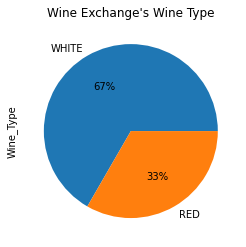

In [402]:
WE_wines['Wine_Type'].value_counts().plot(kind='pie',autopct='%1.0f%%').set(title="Wine Exchange's Wine Type")

# HONEST GRAPES SCRAPES

In [403]:
url = "https://www.honestgrapes.co.uk/wines/red-wine"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())


<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Access denied
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <script src="/cdn-cgi/apps/head/n6EKATdnLbXNJB4S7P4NCuyHOXw.js">
  </script>
  <link href="/cdn-cgi/styles/errors.css" media="screen" rel="stylesheet"/>
  <script>
   (function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:4}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.clas

In [404]:
driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")
driver.get("https://www.honestgrapes.co.uk/wines/red-wine")

/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/4224118564.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")


In [405]:
next_arrow = driver.find_elements(By.XPATH,'//*[@id="amasty-shopby-product-list"]/div[7]/div[2]/ul/li[5]/a')[0]
next_arrow.is_enabled()

True

In [406]:
#Locators
product_name = driver.find_elements(By.XPATH,'//a[@class = "product-item-link"]')
product_region = driver.find_elements(By.XPATH,'//div[@class = "hg-attribute hg_wine_region"]')
product_grape = driver.find_elements(By.XPATH,'//div[@class = "hg-attribute hg_wine_grape"]')
product_delivery = driver.find_elements(By.XPATH,'//div[@class = "hg-attribute hg_delivery_message"]')
product_price = driver.find_elements(By.XPATH,'//span[@class = "price"]')

Framing a data frame

In [407]:
df_redwine = pd.DataFrame(columns = ['Product_Name', 'Product Region', 'Grapes', 'Delivery', 'Price'])

Creating a loop to fill the data set

In [408]:
for i in range(len(product_region)):
    df_redwine = df_redwine.append({'Product_Name':product_name[i].text, 'Product Region':product_region[i].text, 'Grapes':product_grape[i].text, 'Delivery':product_delivery[i].text, 'Price':product_price[i].text}, ignore_index = True)

/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/2366705455.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_redwine = df_redwine.append({'Product_Name':product_name[i].text, 'Product Region':product_region[i].text, 'Grapes':product_grape[i].text, 'Delivery':product_delivery[i].text, 'Price':product_price[i].text}, ignore_index = True)
/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/2366705455.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_redwine = df_redwine.append({'Product_Name':product_name[i].text, 'Product Region':product_region[i].text, 'Grapes':product_grape[i].text, 'Delivery':product_delivery[i].text, 'Price':product_price[i].text}, ignore_index = True)
/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/2366705455.py:2: FutureWarning: The f

Checking the dataframe

In [409]:
df_redwine

Product_Name        Product Region  \
0                    Honest Grapes 8th Birthday Case                Tuscany   
1                                                                             
2                                                                    Marche   
3                                                                             
4      Mastrojanni, Brunello Di Montalcino DOCG, 2015  Languedoc-Roussillon   
5                                                                             
6                                                                   Mendoza   
7                                                                             
8   Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...            Beaujolais   
9                                                                             
10                                                                  Tuscany   
11                                                                            
12                 Moulin De Gassac Tèrra Rouge, 2020            Beaujolais   
13                                                                            
14                                                                 Bordeaux   
15                                                                            
16        Catena Appellation Malbec La Consulta, 2019              Bordeaux   
17                                                                            
18                                                                 Trentino   
19                                                                            
20       Jane Eyre Fleurie 'Vendanges Entieres', 2021             Catalonia   
21                                                                            

                                   Grapes  \
0                              Sangiovese   
1                                           
2                                 Lacrima   
3                                           
4               Carignan, Grenache, Syrah   
5                                           
6                                  Malbec   
7                                           
8                                   Gamay   
9                                           
10                             Sangiovese   
11                                          
12                                  Gamay   
13                                          
14                         Malbec, Merlot   
15                                          
16             Cabernet Sauvignon, Malbec   
17                                          
18  Cabernet Sauvignon, Carmenère, Merlot   
19                                          
20    Cabernet Sauvignon, Grenache, Syrah   
21                                          

                                      Delivery    Price  
0   Free delivery on duty paid orders over £75  £148.50  
1                                               £165.00  
2                       Free delivery over £75           
3                                                        
4                       Free delivery over £75   £52.50  
5                                                        
6                       Free delivery over £75   £19.90  
7                                                        
8                       Free delivery over £75   £17.00  
9                                                        
10                      Free delivery over £75   £15.00  
11                                                       
12            Free Duty Paid delivery over £75  £132.00  
13                                                       
14                      Free delivery over £75   £54.00  
15                                                       
16                      Free delivery over £75   £28.50  
17                                                       
18                      Free delivery over £75   £12.80  
19                         

Detecting for any duplicate values

In [410]:
dups = df_redwine.duplicated()

In [411]:
print(dups.any())

True


Checking the problematic rows

In [412]:
print(df_redwine[dups])

   Product_Name Product Region Grapes Delivery Price
5                                                   
7                                                   
9                                                   
11                                                  
13                                                  
15                                                  
17                                                  
19                                                  
21                                                  


Checking the current shape of the dataframe

In [413]:
print(df_redwine.shape)

(22, 5)


Removing the duplicate rows and generating the new dataframe

In [414]:

df_redwine.drop_duplicates(inplace=True)
print(df_redwine.shape)

(13, 5)


Reviewing the data

In [415]:
df_redwine

Product_Name        Product Region  \
0                    Honest Grapes 8th Birthday Case                Tuscany   
1                                                                             
2                                                                    Marche   
3                                                                             
4      Mastrojanni, Brunello Di Montalcino DOCG, 2015  Languedoc-Roussillon   
6                                                                   Mendoza   
8   Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...            Beaujolais   
10                                                                  Tuscany   
12                 Moulin De Gassac Tèrra Rouge, 2020            Beaujolais   
14                                                                 Bordeaux   
16        Catena Appellation Malbec La Consulta, 2019              Bordeaux   
18                                                                 Trentino   
20       Jane Eyre Fleurie 'Vendanges Entieres', 2021             Catalonia   

                                   Grapes  \
0                              Sangiovese   
1                                           
2                                 Lacrima   
3                                           
4               Carignan, Grenache, Syrah   
6                                  Malbec   
8                                   Gamay   
10                             Sangiovese   
12                                  Gamay   
14                         Malbec, Merlot   
16             Cabernet Sauvignon, Malbec   
18  Cabernet Sauvignon, Carmenère, Merlot   
20    Cabernet Sauvignon, Grenache, Syrah   

                                      Delivery    Price  
0   Free delivery on duty paid orders over £75  £148.50  
1                                               £165.00  
2                       Free delivery over £75           
3                                                        
4                       Free delivery over £75   £52.50  
6                       Free delivery over £75   £19.90  
8                       Free delivery over £75   £17.00  
10                      Free delivery over £75   £15.00  
12            Free Duty Paid delivery over £75  £132.00  
14                      Free delivery over £75   £54.00  
16                      Free delivery over £75   £28.50  
18                      Free delivery over £75   £12.80  
20                      Free delivery over £75   £15.40

Replacing the Pound sign to get visualisation

In [416]:
df_redwine['Price'] = df_redwine['Price'].str.replace('£', '')

Review the data

In [417]:
df_redwine

Product_Name        Product Region  \
0                    Honest Grapes 8th Birthday Case                Tuscany   
1                                                                             
2                                                                    Marche   
3                                                                             
4      Mastrojanni, Brunello Di Montalcino DOCG, 2015  Languedoc-Roussillon   
6                                                                   Mendoza   
8   Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...            Beaujolais   
10                                                                  Tuscany   
12                 Moulin De Gassac Tèrra Rouge, 2020            Beaujolais   
14                                                                 Bordeaux   
16        Catena Appellation Malbec La Consulta, 2019              Bordeaux   
18                                                                 Trentino   
20       Jane Eyre Fleurie 'Vendanges Entieres', 2021             Catalonia   

                                   Grapes  \
0                              Sangiovese   
1                                           
2                                 Lacrima   
3                                           
4               Carignan, Grenache, Syrah   
6                                  Malbec   
8                                   Gamay   
10                             Sangiovese   
12                                  Gamay   
14                         Malbec, Merlot   
16             Cabernet Sauvignon, Malbec   
18  Cabernet Sauvignon, Carmenère, Merlot   
20    Cabernet Sauvignon, Grenache, Syrah   

                                      Delivery   Price  
0   Free delivery on duty paid orders over £75  148.50  
1                                               165.00  
2                       Free delivery over £75          
3                                                       
4                       Free delivery over £75   52.50  
6                       Free delivery over £75   19.90  
8                       Free delivery over £75   17.00  
10                      Free delivery over £75   15.00  
12            Free Duty Paid delivery over £75  132.00  
14                      Free delivery over £75   54.00  
16                      Free delivery over £75   28.50  
18                      Free delivery over £75   12.80  
20                      Free delivery over £75   15.40

Changing the price into interger

Review the data

In [418]:
df_redwine

Product_Name        Product Region  \
0                    Honest Grapes 8th Birthday Case                Tuscany   
1                                                                             
2                                                                    Marche   
3                                                                             
4      Mastrojanni, Brunello Di Montalcino DOCG, 2015  Languedoc-Roussillon   
6                                                                   Mendoza   
8   Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...            Beaujolais   
10                                                                  Tuscany   
12                 Moulin De Gassac Tèrra Rouge, 2020            Beaujolais   
14                                                                 Bordeaux   
16        Catena Appellation Malbec La Consulta, 2019              Bordeaux   
18                                                                 Trentino   
20       Jane Eyre Fleurie 'Vendanges Entieres', 2021             Catalonia   

                                   Grapes  \
0                              Sangiovese   
1                                           
2                                 Lacrima   
3                                           
4               Carignan, Grenache, Syrah   
6                                  Malbec   
8                                   Gamay   
10                             Sangiovese   
12                                  Gamay   
14                         Malbec, Merlot   
16             Cabernet Sauvignon, Malbec   
18  Cabernet Sauvignon, Carmenère, Merlot   
20    Cabernet Sauvignon, Grenache, Syrah   

                                      Delivery   Price  
0   Free delivery on duty paid orders over £75  148.50  
1                                               165.00  
2                       Free delivery over £75          
3                                                       
4                       Free delivery over £75   52.50  
6                       Free delivery over £75   19.90  
8                       Free delivery over £75   17.00  
10                      Free delivery over £75   15.00  
12            Free Duty Paid delivery over £75  132.00  
14                      Free delivery over £75   54.00  
16                      Free delivery over £75   28.50  
18                      Free delivery over £75   12.80  
20                      Free delivery over £75   15.40

Getting out the Null rows

In [419]:
df_redwine_updated = df_redwine.drop(df_redwine.index[1:4])

In [420]:
df_redwine_updated['Price'] = pd.to_numeric(df_redwine_updated['Price'])

In [421]:
df_redwine_updated

Product_Name        Product Region  \
0                    Honest Grapes 8th Birthday Case                Tuscany   
4      Mastrojanni, Brunello Di Montalcino DOCG, 2015  Languedoc-Roussillon   
6                                                                   Mendoza   
8   Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...            Beaujolais   
10                                                                  Tuscany   
12                 Moulin De Gassac Tèrra Rouge, 2020            Beaujolais   
14                                                                 Bordeaux   
16        Catena Appellation Malbec La Consulta, 2019              Bordeaux   
18                                                                 Trentino   
20       Jane Eyre Fleurie 'Vendanges Entieres', 2021             Catalonia   

                                   Grapes  \
0                              Sangiovese   
4               Carignan, Grenache, Syrah   
6                                  Malbec   
8                                   Gamay   
10                             Sangiovese   
12                                  Gamay   
14                         Malbec, Merlot   
16             Cabernet Sauvignon, Malbec   
18  Cabernet Sauvignon, Carmenère, Merlot   
20    Cabernet Sauvignon, Grenache, Syrah   

                                      Delivery  Price  
0   Free delivery on duty paid orders over £75  148.5  
4                       Free delivery over £75   52.5  
6                       Free delivery over £75   19.9  
8                       Free delivery over £75   17.0  
10                      Free delivery over £75   15.0  
12            Free Duty Paid delivery over £75  132.0  
14                      Free delivery over £75   54.0  
16                      Free delivery over £75   28.5  
18                      Free delivery over £75   12.8  
20                      Free delivery over £75   15.4

In [422]:
    
HG_RED_wine = pd.DataFrame(df_redwine_updated)
HG_RED_wine.insert(0,'Wine_Type','RED')

Getting a boxplot to visuialise the price

[Text(0.5, 1.0, 'Honest Grapes Red Wine Price Distribution')]

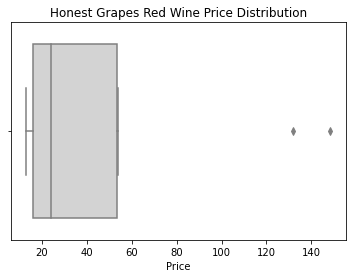

In [423]:
sns.boxplot(data=df_redwine_updated, x="Price",color="lightgrey").set(title="Honest Grapes Red Wine Price Distribution")

In [424]:
df_redwine_updated['Price'] = pd.to_numeric(df_redwine_updated['Price'])

In [425]:
HONESTGRED=df_redwine_updated['Price']

In [426]:
HONESTGRED

0     148.5
4      52.5
6      19.9
8      17.0
10     15.0
12    132.0
14     54.0
16     28.5
18     12.8
20     15.4
Name: Price, dtype: float64

Removing the Outlier to get a better visualisation

In [427]:
df_redwine_updated_outlier = df_redwine_updated.drop(df_redwine_updated.index[0])

In [428]:
df_redwine_updated_outlier

Wine_Type                                       Product_Name  \
4        RED     Mastrojanni, Brunello Di Montalcino DOCG, 2015   
6        RED                                                      
8        RED  Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...   
10       RED                                                      
12       RED                 Moulin De Gassac Tèrra Rouge, 2020   
14       RED                                                      
16       RED        Catena Appellation Malbec La Consulta, 2019   
18       RED                                                      
20       RED       Jane Eyre Fleurie 'Vendanges Entieres', 2021   

          Product Region                                 Grapes  \
4   Languedoc-Roussillon              Carignan, Grenache, Syrah   
6                Mendoza                                 Malbec   
8             Beaujolais                                  Gamay   
10               Tuscany                             Sangiovese   
12            Beaujolais                                  Gamay   
14              Bordeaux                         Malbec, Merlot   
16              Bordeaux             Cabernet Sauvignon, Malbec   
18              Trentino  Cabernet Sauvignon, Carmenère, Merlot   
20             Catalonia    Cabernet Sauvignon, Grenache, Syrah   

                            Delivery  Price  
4             Free delivery over £75   52.5  
6             Free delivery over £75   19.9  
8             Free delivery over £75   17.0  
10            Free delivery over £75   15.0  
12  Free Duty Paid delivery over £75  132.0  
14            Free delivery over £75   54.0  
16            Free delivery over £75   28.5  
18            Free delivery over £75   12.8  
20            Free delivery over £75   15.4

Getting a visualisation without the outlier

[Text(0.5, 1.0, 'Honest Grapes Red Wine Price Distribution')]

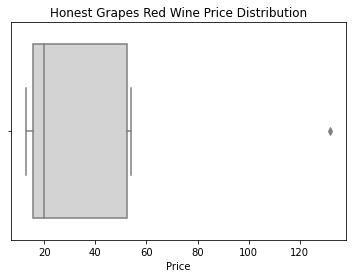

In [429]:
sns.boxplot(data=df_redwine_updated_outlier, x="Price", color="lightgrey").set(title="Honest Grapes Red Wine Price Distribution")

In [430]:
df_redwine_updated.describe()

Price
count   10.000000
mean    49.560000
std     50.232597
min     12.800000
25%     15.800000
50%     24.200000
75%     53.625000
max    148.500000

In [431]:
HonestG_dropped= df_redwine_updated.drop(columns=['Product Region', 'Grapes','Delivery'])

In [432]:
HonestG_dropped

Wine_Type                                       Product_Name  Price
0        RED                   Honest Grapes 8th Birthday Case   148.5
4        RED     Mastrojanni, Brunello Di Montalcino DOCG, 2015   52.5
6        RED                                                      19.9
8        RED  Mazzola Sangvineto, Lacrima Di Morro D'Alba Su...   17.0
10       RED                                                      15.0
12       RED                 Moulin De Gassac Tèrra Rouge, 2020  132.0
14       RED                                                      54.0
16       RED        Catena Appellation Malbec La Consulta, 2019   28.5
18       RED                                                      12.8
20       RED       Jane Eyre Fleurie 'Vendanges Entieres', 2021   15.4

Similar done for White wine

In [433]:
url = "https://www.honestgrapes.co.uk/wines/white-wine"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Access denied
  </title>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <script src="/cdn-cgi/apps/head/n6EKATdnLbXNJB4S7P4NCuyHOXw.js">
  </script>
  <link href="/cdn-cgi/styles/errors.css" media="screen" rel="stylesheet"/>
  <script>
   (function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:4}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.clas

In [434]:
driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")
driver.get("https://www.honestgrapes.co.uk/wines/white-wine")


/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/3400401510.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")


In [435]:
next_arrow = driver.find_elements(By.XPATH,'//*[@id="amasty-shopby-product-list"]/div[7]/div[2]/ul/li[5]/a')[0]
next_arrow.is_enabled()

True

In [436]:
#Locators
product_name = driver.find_elements(By.XPATH,'//a[@class = "product-item-link"]')
product_region = driver.find_elements(By.XPATH,'//div[@class = "hg-attribute hg_wine_region"]')
product_grape = driver.find_elements(By.XPATH,'//div[@class = "hg-attribute hg_wine_grape"]')
product_delivery = driver.find_elements(By.XPATH,'//div[@class = "hg-attribute hg_delivery_message"]')
product_price = driver.find_elements(By.XPATH,'//span[@class = "price"]')

In [437]:
df_whitewine = pd.DataFrame(columns = ['Product Name', 'Product Region', 'Grapes', 'Delivery', 'Price'])

In [438]:
for i in range(len(product_region)):
    df_whitewine = df_whitewine.append({'Product Name':product_name[i].text, 'Product Region':product_region[i].text, 'Grapes':product_grape[i].text, 'Delivery':product_delivery[i].text, 'Price':product_price[i].text}, ignore_index = True)

/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/1025695922.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_whitewine = df_whitewine.append({'Product Name':product_name[i].text, 'Product Region':product_region[i].text, 'Grapes':product_grape[i].text, 'Delivery':product_delivery[i].text, 'Price':product_price[i].text}, ignore_index = True)
/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/1025695922.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_whitewine = df_whitewine.append({'Product Name':product_name[i].text, 'Product Region':product_region[i].text, 'Grapes':product_grape[i].text, 'Delivery':product_delivery[i].text, 'Price':product_price[i].text}, ignore_index = True)
/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/1025695922.py:2: FutureWarnin

In [439]:
df_whitewine

Product Name        Product Region  \
0           Honest Grapes 8th Birthday Case               Burgundy   
1                                                                    
2                                                           Umbria   
3                                                                    
4   Domaine Nadine Ferrand Macon Blanc, 2020              Burgundy   
5                                                                    
6                                                         Burgundy   
7                                                                    
8        Bramito Della Sala Chardonnay, 2021              Piedmont   
9                                                                    
10                                                     Marlborough   
11                                                                   
12  Domaine Nadine Ferrand Saint Veran, 2019              Burgundy   
13                                                                   
14                                            Languedoc-Roussillon   
15                                                                   
16  Edouard Delaunay Bourgogne Aligoté, 2019  Languedoc-Roussillon   
17                                                                   
18                                                          Bierzo   
19                                                                   
20     Villa Sparina Gavi Di Gavi DOCG, 2021  Languedoc-Roussillon   
21                                                                   

                                          Grapes  \
0                                     Chardonnay   
1                                                  
2                                     Chardonnay   
3                                                  
4                                     Chardonnay   
5                                                  
6                                        Aligoté   
7                                                  
8                                        Cortese   
9                                                  
10                               Sauvignon Blanc   
11                                                 
12                                    Chardonnay   
13                                                 
14  Chardonnay, Chenin Blanc, Marsanne, Viognier   
15                                                 
16   Chardonnay, Colombard, Vermentino, Viognier   
17                                                 
18                                       Godello   
19                                                 
20         Grenache Blanc, Roussanne, Vermentino   
21                                                 

                                      Delivery    Price  
0   Free delivery on duty paid orders over £75  £148.50  
1                                               £165.00  
2                       Free delivery over £75           
3                                                        
4             Free Duty Paid delivery over £75   £18.00  
5                                                        
6                       Free delivery over £75   £22.00  
7                                                        
8                       Free delivery over £75   £19.95  
9                                                        
10                      Free delivery over £75   £21.00  
11                                                       
12                      Free delivery over £75   £21.00  
13                                                       
14                      Free delivery over £75   £19.00  
15                                                       
16            Free Duty Paid delivery over £75   £59.00  
17                                                       
18                      Free delivery over £75   £39.50  
19                                                       
20    

In [440]:
dups = df_whitewine.duplicated()

In [441]:
print(df_whitewine[dups])

   Product Name Product Region Grapes Delivery Price
5                                                   
7                                                   
9                                                   
11                                                  
13                                                  
15                                                  
17                                                  
19                                                  
21                                                  


In [442]:
df_whitewine.drop_duplicates(inplace=True)
print(df_whitewine.shape)

(13, 5)


In [443]:
df_whitewine

Product Name        Product Region  \
0           Honest Grapes 8th Birthday Case               Burgundy   
1                                                                    
2                                                           Umbria   
3                                                                    
4   Domaine Nadine Ferrand Macon Blanc, 2020              Burgundy   
6                                                         Burgundy   
8        Bramito Della Sala Chardonnay, 2021              Piedmont   
10                                                     Marlborough   
12  Domaine Nadine Ferrand Saint Veran, 2019              Burgundy   
14                                            Languedoc-Roussillon   
16  Edouard Delaunay Bourgogne Aligoté, 2019  Languedoc-Roussillon   
18                                                          Bierzo   
20     Villa Sparina Gavi Di Gavi DOCG, 2021  Languedoc-Roussillon   

                                          Grapes  \
0                                     Chardonnay   
1                                                  
2                                     Chardonnay   
3                                                  
4                                     Chardonnay   
6                                        Aligoté   
8                                        Cortese   
10                               Sauvignon Blanc   
12                                    Chardonnay   
14  Chardonnay, Chenin Blanc, Marsanne, Viognier   
16   Chardonnay, Colombard, Vermentino, Viognier   
18                                       Godello   
20         Grenache Blanc, Roussanne, Vermentino   

                                      Delivery    Price  
0   Free delivery on duty paid orders over £75  £148.50  
1                                               £165.00  
2                       Free delivery over £75           
3                                                        
4             Free Duty Paid delivery over £75   £18.00  
6                       Free delivery over £75   £22.00  
8                       Free delivery over £75   £19.95  
10                      Free delivery over £75   £21.00  
12                      Free delivery over £75   £21.00  
14                      Free delivery over £75   £19.00  
16            Free Duty Paid delivery over £75   £59.00  
18                      Free delivery over £75   £39.50  
20                      Free delivery over £75   £16.40

In [444]:
df_whitewine_updated = df_whitewine.drop(df_whitewine.index[1:4])

In [445]:
df_whitewine_updated

Product Name        Product Region  \
0           Honest Grapes 8th Birthday Case               Burgundy   
4   Domaine Nadine Ferrand Macon Blanc, 2020              Burgundy   
6                                                         Burgundy   
8        Bramito Della Sala Chardonnay, 2021              Piedmont   
10                                                     Marlborough   
12  Domaine Nadine Ferrand Saint Veran, 2019              Burgundy   
14                                            Languedoc-Roussillon   
16  Edouard Delaunay Bourgogne Aligoté, 2019  Languedoc-Roussillon   
18                                                          Bierzo   
20     Villa Sparina Gavi Di Gavi DOCG, 2021  Languedoc-Roussillon   

                                          Grapes  \
0                                     Chardonnay   
4                                     Chardonnay   
6                                        Aligoté   
8                                        Cortese   
10                               Sauvignon Blanc   
12                                    Chardonnay   
14  Chardonnay, Chenin Blanc, Marsanne, Viognier   
16   Chardonnay, Colombard, Vermentino, Viognier   
18                                       Godello   
20         Grenache Blanc, Roussanne, Vermentino   

                                      Delivery    Price  
0   Free delivery on duty paid orders over £75  £148.50  
4             Free Duty Paid delivery over £75   £18.00  
6                       Free delivery over £75   £22.00  
8                       Free delivery over £75   £19.95  
10                      Free delivery over £75   £21.00  
12                      Free delivery over £75   £21.00  
14                      Free delivery over £75   £19.00  
16            Free Duty Paid delivery over £75   £59.00  
18                      Free delivery over £75   £39.50  
20                      Free delivery over £75   £16.40

In [446]:
df_whitewine_updated['Price'] = df_whitewine_updated['Price'].str.replace('£', '')

In [447]:
df_whitewine_updated['Price'] = pd.to_numeric(df_whitewine_updated['Price'])

In [448]:

HG_White_wine = pd.DataFrame(df_whitewine_updated)
HG_White_wine.insert(0,'Wine_Type','White')

In [449]:
HONESTGWHITE=df_whitewine_updated['Price']

In [450]:
HONESTGWHITE

0     148.50
4      18.00
6      22.00
8      19.95
10     21.00
12     21.00
14     19.00
16     59.00
18     39.50
20     16.40
Name: Price, dtype: float64

[Text(0.5, 1.0, 'Honest Grapes White Wines Price Distribution')]

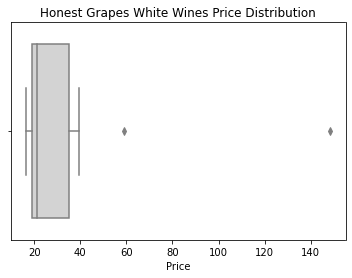

In [451]:
sns.boxplot(data=df_whitewine_updated, x="Price", color="lightgrey").set(title="Honest Grapes White Wines Price Distribution")

In [452]:
df_whitewine_outlier_updated = df_whitewine_updated.drop(df_whitewine_updated.index[0])

In [453]:
df_whitewine_outlier_updated

Wine_Type                              Product Name        Product Region  \
4      White  Domaine Nadine Ferrand Macon Blanc, 2020              Burgundy   
6      White                                                        Burgundy   
8      White       Bramito Della Sala Chardonnay, 2021              Piedmont   
10     White                                                     Marlborough   
12     White  Domaine Nadine Ferrand Saint Veran, 2019              Burgundy   
14     White                                            Languedoc-Roussillon   
16     White  Edouard Delaunay Bourgogne Aligoté, 2019  Languedoc-Roussillon   
18     White                                                          Bierzo   
20     White     Villa Sparina Gavi Di Gavi DOCG, 2021  Languedoc-Roussillon   

                                          Grapes  \
4                                     Chardonnay   
6                                        Aligoté   
8                                        Cortese   
10                               Sauvignon Blanc   
12                                    Chardonnay   
14  Chardonnay, Chenin Blanc, Marsanne, Viognier   
16   Chardonnay, Colombard, Vermentino, Viognier   
18                                       Godello   
20         Grenache Blanc, Roussanne, Vermentino   

                            Delivery  Price  
4   Free Duty Paid delivery over £75  18.00  
6             Free delivery over £75  22.00  
8             Free delivery over £75  19.95  
10            Free delivery over £75  21.00  
12            Free delivery over £75  21.00  
14            Free delivery over £75  19.00  
16  Free Duty Paid delivery over £75  59.00  
18            Free delivery over £75  39.50  
20            Free delivery over £75  16.40

<AxesSubplot:xlabel='Price'>

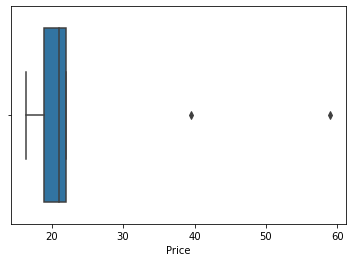

In [454]:
sns.boxplot(data=df_whitewine_outlier_updated, x="Price")

In [455]:
df_whitewine_updated.describe()

Price
count   10.000000
mean    38.435000
std     40.877826
min     16.400000
25%     19.237500
50%     21.000000
75%     35.125000
max    148.500000

In [456]:
frames = [df_redwine_updated,df_whitewine_updated]
Honest_wines = pd.concat(frames,ignore_index=True)

In [457]:
frames1 = [HG_RED_wine,HG_White_wine]
Honest_wines_type = pd.concat(frames1,ignore_index=True)

[Text(0.5, 1.0, "Honest's grapes wine Type Count")]

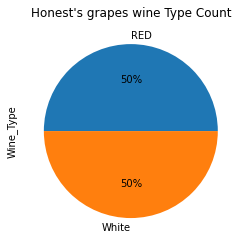

In [458]:
Honest_wines_type['Wine_Type'].value_counts().plot(kind='pie',autopct='%1.0f%%').set(title="Honest's grapes wine Type Count")

Text(0, 0.5, '')

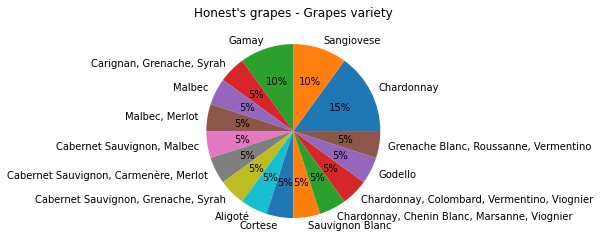

In [459]:
Honest_wines['Grapes'].value_counts().plot(kind='pie',autopct='%0.0f%%').set(title="Honest's grapes - Grapes variety")
plt.xlabel("")
plt.ylabel("")





Text(0, 0.5, '')

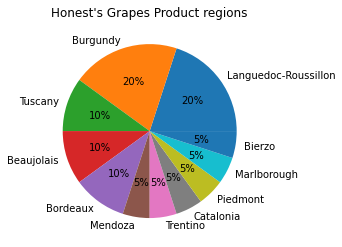

In [460]:
Honest_wines['Product Region'].value_counts().plot(kind='pie',autopct='%1.0f%%').set(title="Honest's Grapes Product regions")
plt.xlabel("")
plt.ylabel("")


# LIDL SCRAPE

In [461]:
#Acessing Lidl using Selenium 
driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")
driver.get('https://www.lidl.co.uk/our-products/wines-beers-spirits/wines/white-wine')

/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/2690115002.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")


In [462]:
#Accept Cookies using Selenium
cookie_button = driver.find_element(By.XPATH,'//button[@class="cookie-alert-extended-button"]')
cookie_button.click()

In [463]:
#Accessing White Wine links
White_Wine_link= driver.find_elements(By.XPATH,'//a[@class="ret-o-card__link nuc-a-anchor"]')

White_Wine_urls = []
for i in White_Wine_link:
    White_Wine_urls.append(i.get_attribute('href'))

In [464]:
#Scraping Data and Cleaning
Name = []
Price = []

for link in White_Wine_urls:
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    name = soup.find("h1", class_="attributebox__headline attributebox__headline--h1").text
    name = re.sub('\s+', ' ', name)
    Name.append(name)
    price= soup.find("span",class_="pricebox__price").text
    price = re.sub('\s+', ' ', price)
    Price.append(price)
    
Lidl_White_Wine = pd.DataFrame(
    {'Product_Name': Name,
     'Price': Price
    })

Lidl_White_Wine.insert(0,'Wine_Type','White') 
Lidl_White_Wine['Price'] = Lidl_White_Wine['Price'].str.replace('£ ', '')
Lidl_White_Wine['Price'] = pd.to_numeric(Lidl_White_Wine['Price'])
Lidl_White_Wine

Wine_Type                                       Product_Name  Price
0      White   Winemaker's Selection New Zealand Pinot Gris ...   6.99
1      White               Cimarosa Malborough Sauvignon Blanc    6.49
2      White                                         Gavi DOCG    6.99
3      White                          Pecorino Terre di Chiete    5.49
4      White                                      Pinot Grigio    5.49
5      White                                   Sauvignon Blanc    6.49
6      White                          Cepa Lebrel Rioja Blanco    4.49
7      White       Cimarosa Chilean Chardonnay Reserva Privada    5.99
8      White            Thörnicher St. Michael, Mosel Riesling    4.99
9      White                             Chardonnay, Pays d'Oc    4.49
10     White   Winemaker's Selection Fairtrade Paarl Chenin ...   5.79
11     White                                    Soave Classico    3.99
12     White                   Cimarosa Californian Chardonnay    5.29
13     White      Cimarosa Australian Semillon Sauvignon Blanc    4.69
14     White                       Giulio Pasotti Pinot Grigio    4.19
15     White                        Sauvignon Blanc, Pays d'Oc    4.49
16     White                    Cimarosa Chilean Pedro Jimenez    4.39
17     White                  Cimarosa Chilean Sauvignon Blanc    3.89
18     White          Cimarosa Australian Chardonnay Colombard    4.39
19     White                    Cimarosa Australian Chardonnay    4.25
20     White               Cimarosa South African Chenin Blanc    3.99
21     White            Cimarosa South African Sauvignon Blanc    3.99
22     White                            Hungarian Pinot Grigio    4.49
23     White                   Conde Noble, Spanish White Wine    3.29

In [465]:
LIDLWHITE=Lidl_White_Wine['Price']

In [466]:
LIDLWHITE

0     6.99
1     6.49
2     6.99
3     5.49
4     5.49
5     6.49
6     4.49
7     5.99
8     4.99
9     4.49
10    5.79
11    3.99
12    5.29
13    4.69
14    4.19
15    4.49
16    4.39
17    3.89
18    4.39
19    4.25
20    3.99
21    3.99
22    4.49
23    3.29
Name: Price, dtype: float64

 Red Wine

In [467]:
#Acessing Lidl using Selenium
driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")
driver.get('https://www.lidl.co.uk/our-products/wines-beers-spirits/wines/red-wine')

/var/folders/nw/frs236fn5nn9ztd8wwpz98sw0000gn/T/ipykernel_12358/800746927.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/mihirsalunke/Downloads/chromedriver")


In [468]:
#Accept Cookies using Selenium
cookie_button = driver.find_element(By.XPATH,'//button[@class="cookie-alert-extended-button"]')
cookie_button.click()

In [469]:
#Accessing Red Wine links
Red_link= driver.find_elements(By.XPATH,'//a[@class="ret-o-card__link nuc-a-anchor"]')

Red_Wine_urls = []
for i in Red_link:
    Red_Wine_urls.append(i.get_attribute('href'))
    

In [470]:
#Scraping Data and Cleaning
Name = []
Price = []


for link in Red_Wine_urls:
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    name = soup.find("h1", class_="attributebox__headline attributebox__headline--h1").text
    name = re.sub('\s+', ' ', name)
    Name.append(name)
    price= soup.find("span",class_="pricebox__price").text
    price = re.sub('\s+', ' ', price)
    Price.append(price)

Lidl_Red_Wine = pd.DataFrame(
    {'Product_Name': Name,
     'Price': Price
    })
Lidl_Red_Wine.insert(0,'Wine_Type','Red') 
Lidl_Red_Wine['Price'] = Lidl_Red_Wine['Price'].str.replace('£ ', '')
Lidl_Red_Wine['Price'] = pd.to_numeric(Lidl_Red_Wine['Price'])
Lidl_Red_Wine

Wine_Type                                       Product_Name  Price
0        Red                        Agramont Garnacha Old Vine    5.99
1        Red                                      Barolo, DOCG   13.99
2        Red                           Saint Emilion Grand Cru   12.99
3        Red      Winemaker's Selection Marlborough Pinot Noir    7.99
4        Red                                   Chianti Riserva    5.99
5        Red   Winemaker's Selection Coonawarra Cabernet Sau...   6.79
6        Red       Winemaker's Selection Barossa Valley Shiraz    6.99
7        Red                               Beaujolais Villages    5.99
8        Red                    Chilean Malbec Reserva Privada    4.99
9        Red                                Bordeaux Supérieur    5.99
10       Red                           Cimarosa Mendoza Malbec    4.49
11       Red                         Cepa Lebrel Rioja Reserva    5.99
12       Red                         Cepa Lebrel Rioja Crianza    5.29
13       Red      Winemaker's Selection Fairtrade Paarl Shiraz    5.49
14       Red                           Cepa Lebrel Rioja Joven    4.49
15       Red                  Baturrica Tarragona Gran Reserva    4.99
16       Red                                          Bordeaux    4.99
17       Red                      Nero d'Avola Terre Siciliane    4.99
18       Red                               Cimarosa Pinot Noir    4.29
19       Red                                 Merlot, Pays d'Oc    4.69
20       Red         Cimarosa South African Cabernet Sauvignon    3.99
21       Red                           Corte alle Mura Chianti    4.49
22       Red                                Californian Merlot    4.49
23       Red                                    Côtes du Rhône    4.29
24       Red            Cimarosa Australian Cabernet Sauvignon    4.49
25       Red               Cimarosa Chilean Cabernet Sauvignon    4.29
26       Red   Cimarosa South African Shiraz Cabernet Sauvig...   3.89
27       Red                        Cimarosa Australian Merlot    4.29
28       Red                           Cimarosa Chilean Merlot    4.49
29       Red                   Cimarosa South African Pinotage    4.29
30       Red                        Cimarosa Australian Shiraz    4.25
31       Red       Cimarosa New Zealand Pinot Noir Marlborough    7.99
32       Red                     Conde Noble, Spanish Red Wine    2.99
33       Red                  Libertario La Mancha Tempranillo    3.79
34       Red     Cimarosa Chilean Cabernet Sauvignon Miniature    1.85
35       Red      Cimarosa Californian Ruby Cabernet Miniature    1.85
36       Red                Comte Tolosan Malbec IGP Sud-Ouest    4.99
37       Red        Viajero Chile Merlot Reserva Privada Valle    5.49

In [471]:
LIDLRED=Lidl_Red_Wine['Price']

In [472]:
LIDLRED

0      5.99
1     13.99
2     12.99
3      7.99
4      5.99
5      6.79
6      6.99
7      5.99
8      4.99
9      5.99
10     4.49
11     5.99
12     5.29
13     5.49
14     4.49
15     4.99
16     4.99
17     4.99
18     4.29
19     4.69
20     3.99
21     4.49
22     4.49
23     4.29
24     4.49
25     4.29
26     3.89
27     4.29
28     4.49
29     4.29
30     4.25
31     7.99
32     2.99
33     3.79
34     1.85
35     1.85
36     4.99
37     5.49
Name: Price, dtype: float64

Merging and Further Data Cleaning

In [473]:
frames = [Lidl_Red_Wine, Lidl_White_Wine]
df = pd.concat(frames,ignore_index=True)

In [474]:
df.index = np.arange(1, len(df) + 1)
df.head(60)

Wine_Type                                       Product_Name  Price
1        Red                        Agramont Garnacha Old Vine    5.99
2        Red                                      Barolo, DOCG   13.99
3        Red                           Saint Emilion Grand Cru   12.99
4        Red      Winemaker's Selection Marlborough Pinot Noir    7.99
5        Red                                   Chianti Riserva    5.99
6        Red   Winemaker's Selection Coonawarra Cabernet Sau...   6.79
7        Red       Winemaker's Selection Barossa Valley Shiraz    6.99
8        Red                               Beaujolais Villages    5.99
9        Red                    Chilean Malbec Reserva Privada    4.99
10       Red                                Bordeaux Supérieur    5.99
11       Red                           Cimarosa Mendoza Malbec    4.49
12       Red                         Cepa Lebrel Rioja Reserva    5.99
13       Red                         Cepa Lebrel Rioja Crianza    5.29
14       Red      Winemaker's Selection Fairtrade Paarl Shiraz    5.49
15       Red                           Cepa Lebrel Rioja Joven    4.49
16       Red                  Baturrica Tarragona Gran Reserva    4.99
17       Red                                          Bordeaux    4.99
18       Red                      Nero d'Avola Terre Siciliane    4.99
19       Red                               Cimarosa Pinot Noir    4.29
20       Red                                 Merlot, Pays d'Oc    4.69
21       Red         Cimarosa South African Cabernet Sauvignon    3.99
22       Red                           Corte alle Mura Chianti    4.49
23       Red                                Californian Merlot    4.49
24       Red                                    Côtes du Rhône    4.29
25       Red            Cimarosa Australian Cabernet Sauvignon    4.49
26       Red               Cimarosa Chilean Cabernet Sauvignon    4.29
27       Red   Cimarosa South African Shiraz Cabernet Sauvig...   3.89
28       Red                        Cimarosa Australian Merlot    4.29
29       Red                           Cimarosa Chilean Merlot    4.49
30       Red                   Cimarosa South African Pinotage    4.29
31       Red                        Cimarosa Australian Shiraz    4.25
32       Red       Cimarosa New Zealand Pinot Noir Marlborough    7.99
33       Red                     Conde Noble, Spanish Red Wine    2.99
34       Red                  Libertario La Mancha Tempranillo    3.79
35       Red     Cimarosa Chilean Cabernet Sauvignon Miniature    1.85
36       Red      Cimarosa Californian Ruby Cabernet Miniature    1.85
37       Red                Comte Tolosan Malbec IGP Sud-Ouest    4.99
38       Red        Viajero Chile Merlot Reserva Privada Valle    5.49
39     White   Winemaker's Selection New Zealand Pinot Gris ...   6.99
40     White               Cimarosa Malborough Sauvignon Blanc    6.49
41     White                                         Gavi DOCG    6.99
42     White                          Pecorino Terre di Chiete    5.49
43     White                                      Pinot Grigio    5.49
44     White                                   Sauvignon Blanc    6.49
45     White                          Cepa Lebrel Rioja Blanco    4.49
46     White       Cimarosa Chilean Chardonnay Reserva Privada    5.99
47     White            Thörnicher St. Michael, Mosel Riesling    4.99
48     White                             Chardonnay, Pays d'Oc    4.49
49     White   Winemaker's Selection Fairtrade Paarl Chenin ...   5.79
50     White                                    Soave Classico    3.99
51     White                   Cimarosa Californian Chardonnay    5.29
52     White      Cimarosa Australian Semillon Sauvignon Blanc    4.69
53     White                       Giulio Pasotti Pinot Grigio    4.19
54     White                        Sauvignon Blanc, Pays d'Oc    4.49
55     White                    Cimarosa Chilean Pedro Jimenez    4.39
56     White               

In [475]:
#Checking Null Values
df.isna().any()

Wine_Type       False
Product_Name    False
Price           False
dtype: bool

In [476]:
#Checking for Duplicates
dups = df.duplicated()
print(dups.any())
df.columns.duplicated()

False


array([False, False, False])

Data Visualization

[Text(0.5, 1.0, ' Lidl White Wine Price Distribution')]

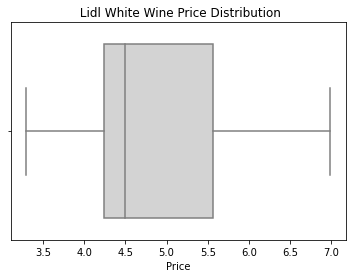

In [477]:
#White Wine Price Range
sns.boxplot(x=Lidl_White_Wine['Price'],color="lightgrey").set(title=" Lidl White Wine Price Distribution")

[Text(0.5, 1.0, 'Lidl Red Wine Price Distribution')]

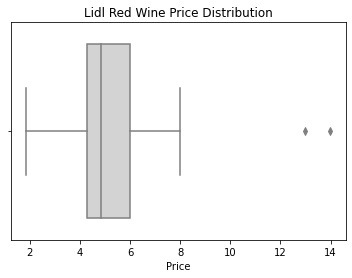

In [478]:
#Red Wine Price Range
sns.boxplot(x=Lidl_Red_Wine['Price'],color="lightgrey").set(title="Lidl Red Wine Price Distribution")

[Text(0.5, 1.0, 'Lidl Wine Types')]

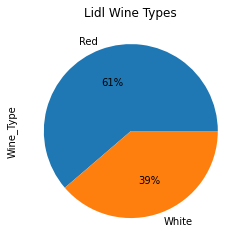

In [479]:
#Wine Type Count
df['Wine_Type'].value_counts().plot(kind='pie',autopct='%1.0f%%').set(title="Lidl Wine Types")

In [480]:
Summary_Statistics=df.groupby(['Wine_Type'])[['Price']].describe()
Summary_Statistics

Price                                                     
          count      mean       std   min    25%   50%    75%    max
Wine_Type                                                           
Red        38.0  5.357895  2.340268  1.85  4.290  4.84  5.990  13.99
White      24.0  4.959167  1.038494  3.29  4.235  4.49  5.565   6.99